<div dir='rtl'>
<h1>0. فهرست مطالب</h1>
<ol>
    <li><a href="#1">تعریف حدی احتمال</a></li>
    موازی با
    Lecture 1 & 2 :  Probability Definition & Combinatorics
    <li><a href="#2">monty hall problem</a></li>
    موازی با
    Lecture 3 : monty hall problem
    <li><a href="#3">مدل‌های بیزی *</a></li>
    موازی با
    Lecture 3 : Conditional Probability
    <li><a href="#4">مدل بیز ساده‌لوح *</a></li>
    موازی با
    Lecture 4 : Independence
    <li><a href="#5">رابطه‌ی توزیع دوجمله‌ای با برنولی</a></li>
    موازی با
    Lecture 5 & 6 : Expectation & Variance
    <li><a href="#6">شبیه‌سازی مسائل</a></li>
    موازی با
    Lecture 5 & 7 : RVs & Distributions
    <li><a href="#7">مدل بیزی با دیگر توزیع‌ها *</a></li>
    موازی با
    Lecture 7 & 9 & 12 : Distributions & Independent RVs
    <li><a href="#8">تخمین توزیع دوجمله‌ای به کمک توزیع‌های نرمال و پواسون</a></li>
    موازی با
    Lecture 7 & 9 : Poisson & Normal Distributions
    <li><a href="#9">تخمین بیزی</a></li>
    موازی با
    Lecture 15 : Beta Distribution & Bayesian Estimation
    <li><a href="#10">قضیه حد مرکزی</a></li>
    موازی با
    Lecture 20 : CLT
    <li><a href="#11">تخمین پارامتر</a></li>
    موازی با
    Lecture 19 & 21 : Sampling & Estimation
    <li><a href="#12">برازش مدل بیز ساده‌لوح با نمونه‌برداری *</a></li>
    موازی با
    Lecture 12 & 14 & 19 & 21 : Conditional Independence & Sampling & Estimation
    <li><a href="#13">آزمون فرض</a></li>
    موازی با
    Lecture 22 & 23 : Confidence Interval & Hypothesis Testing
</ol>
</div>

#<a name='1'></a>
<div dir='rtl'>
<h1>1. تعریف حدی احتمال (Probability Definition)</h1>
</div>

<div dir='rtl'>
طبق تعریف حدی احتمال:
$$
P(A) = \lim_{n \to +\infty} \frac{n_A}{n}
$$
قصد داریم صحت این رابطه را بصورت عملی بررسی کنیم.
این سنجش فقط به صورت شهودی بوده و موضوعیتی را اثبات نمی‌کند (قابل اتکا نیست)؛
اما هدف انجام آزمایش‌های آماری با استفاده از زبان
R
است که این مسئله ما را به این مقصود خواهد رساند.
</div>

<div dir='rtl'>
این مثال از Lecture 1 را در نظر بگیرید:
<br/>
مثال: دو تاس را می‌اندازیم و می‌خواهیم احتمال این را حساب کنیم که مجموع حاصل ۷ شود.
</div>

<div dir='rtl'>
می‌دانیم که هر تاس ۶ وجه دارد و طبق اصل ضرب، تعداد پیش‌آمد‌های ممکن برای پرتاب دو تاس، برابر $6 \times 6 = 36$ خواهد بود.
پیش‌آمد‌های مطلوب ما آن‌هایی خواهند بود که شاهد
$(x,y)$
باشیم به طوری که
$x+y=7$.
بنابراین مجموعه پیش‌آمد‌های مطلوب ما عبارت خواهد بود از:
$$\{(1,6),(2,5),(3,4),(4,3),(5,2),(6,1)\}$$
با فرض عادلانه بودن آزمایش و سالم بودن تاس‌ها، احتمالات رو آمدن هر یک از وجوه یک تاس، متساوی‌الاحتمال هستند. بنابراین، احتمالات مشاهده هر یک از زوج مرت‌های ممکن برای تاس‌ها نیز متساوی‌الاحتمال هستند، پس می‌توانیم از تعریف کلاسیک احتمال استفاده کرده و نتیجه بگیریم که احتمال مشاهده نتیجه مطلوب ما برابر
$\frac{6}{36} = 0.1667$
خواهد بود.
</div>

<div dir='rtl'>
حال به تخمین این احتمال، با استفاده از تعریف حدی احتمال می‌پردازیم. در ابتدا نیاز داریم فضای پیشامد این مثال را آماده کنیم:
</div>

In [ ]:
dice_possible_observations = seq(1, 6)
# The above variable represents all possible observations for one dice value.
# `seq(x,y)` returns an array from x to y by step = 1 as you can see in the
# result.
dice_possible_observations

[1] 1 2 3 4 5 6

In [ ]:
dice_observation_chance_to_appear = rep(1/6, 6)
# `rep(x,y)` returns an array with length = y, full of x values.
# We will use i-th element of this array as the i-th possible observation
# chance to appear.
dice_observation_chance_to_appear

[1] 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667 0.1666667

<div dir='rtl'>
روش نمونه‌گیری، فرآیندی است که به کمک آن زیرمجموعه‌ای از جامعه آماری تهیه می‌شود. این کار به منظور شناخت یا برآورد پارامترهای جامعه آماری صورت می‌گیرد. برای انجام نمونه‌گیری در R، از دستور sample استفاده می‌کنیم.
</div>

In [ ]:
sample(
  x = dice_possible_observations,
  size = 1,
  replace = TRUE,
  prob = dice_observation_chance_to_appear
)

# This function returns an array with length = size, containing fair samples
# from input array "x". It'll use "prob" input as sampling distribution.
# `replace = True` shows that it can repeat an observation in output.
# What we wrote above, will return a single output as a dice observation.
# See the result. Rerun it multiple times to get different results.

[1] 5

In [ ]:
# You can see how to define a function which samples n dice.
sample_of_n_dice <- function(n) {
  return (
    sample(
      x = dice_possible_observations,
      size = n,
      replace = TRUE,
      prob = dice_observation_chance_to_appear
    )
  )
}

sample_of_n_dice(3)

[1] 5 3 6

In [ ]:
# The below function calculates sum of dice.
sum_of_n_dice <- function(n) {
  return (
    sum(
      sample_of_n_dice(n)
    )
  )
}
# The `sum` function takes an input array and returns the sum of its elements.
# See the result. Rerun it multiple times to get different results.
sum_of_n_dice(2)

[1] 5

<div dir='rtl'>
حال در دو بلوک بعدی فرآیند آزمایش را شبیه‌سازی می‌کنیم.
</div>

In [ ]:
# Now we need to repeat the test and store observations.
rownames = seq(2, 12)
colnames = "n"
# We need to record our observation so we create a matrix. It contains the
# number of observations for each possible observation.
# We will increment "n" for i-th row when the i-th observation happens.
observations <- matrix(
  0,
  nrow = 11,
  byrow = TRUE,
  dimnames = list(rownames, colnames)
)
# Now see the result.
observations

,n
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0


In [ ]:
# At the beginning of each experiment, we need to reset parameters.
observations[, "n"] = 0
# This loop will repeat the body, 10000 times with i = 1->1000.
for(i in 1:1000) {
  obs = sum_of_n_dice(2)
  observations[toString(obs), 'n'] = observations[toString(obs), 'n'] + 1
  # In each step, we will increment "n" for row = obs.
  # Pay attention to the indexing. `observations[x, y]` addresses the value of
  # row = x and column = y.
}
# See the observation. Change number of repeats and try again.
observations

,n
2,23
3,49
4,82
5,110
6,147
7,170
8,125
9,121
10,87
11,52


In [ ]:
# Now we need to calculate the probability of observation "7" based on
# `observations`. It's so easy:
result = observations["7", "n"] / sum(observations[, "n"])
result

[1] 0.17

<div dir='rtl'>
حلقه‌ی اصلی آزمایش را با تعداد تکرار ۱۰۰ و ۱۰۰۰۰۰، برای هر کدام ۳ بار تکرار و مشاهدات خود را مکتوب کنید. این مشاهدات را تحلیل کنید.
در این تحلیل، علاوه بر آنچه صلاح می‌دانید، موارد زیر نیز باید بررسی کنید:
<br/>
<li>
با توجه به مقدار واقعی احتمال که در ابتدای این بخش، آن را به صورت تئوری
محاسبه کردیم، میزان دقت این آزمایش را با تعداد نمونه ۱۰۰ در برابر تعداد نمونه ۱۰۰۰۰۰ مقایسه شود. دلیل این اختلاف اهمیت دارد.
</li>
<li>
نتایج سه بار تکرار، برای کدام حالت
(۱۰۰ بار تکرار یا ۱۰۰۰۰۰ بار تکرار)
به هم نزدیک‌تراند؟
</li>
</div>

<div dir='rtl'>
<font color='red'  background-color: blue>
توجه) در کد‌های ارائه شده در این بخش، از حلقه for استفاده شده است. باید دقت کنید که به صورت کلی استفاده از حلقه مطلوب نبوده و باید از آن پرهیز شود. در این بخش با هدف آشنایی با زبان R این نکته نادیده گرفته شده است اما از بخش بعد، از استفاده‌‌ی از این حلقه تا جای ممکن پرهیز می‌شود.
دلیل این پرهیز آن است که محاسبات آماری و نظیر آن، امکان انجام شدن به صورت ماتریسی و موازی در زبان R (و پایتون) را دارند اما زمانی که از حلقه استفاده شود، این مزیت از دست می‌رود و درنتیجه زمان اجرای برنامه‌ها بسیار زیاد می‌شود. روش‌های جایگزینی که جلوتر با آن‌ها آشنا خواهید شد، استفاده از دیتا‌فریم‌ها و ماتریس‌ها و عملگر‌های مختص به آن‌هاست. استفاده از حلقه‌ها باید فقط زمانی صورت بگیرد که شبیه‌سازی مورد نظر واقعا به زمان وابسته باشد و محاسبات هر گام، به گام قبل نیاز داشته باشد.
</font>
</div>

<div dir='rtl'>
<font color='green'>
<h3><font color='green'>اگر مشتاق مشاهده بیشتر هستید، ادامه دهید:</font></h3>
قصد داریم نمودار آزمایش بالا را گام به گام رسم کنیم تا همگرایی نتیجه آزمایش را به مقدار واقعی به مرور زمان (با زیاد شدن تعداد نمونه‌ها) مشاهده کنیم.
کد‌های این قسمت توضیح داده نخواهند شد.
</font>
</div>

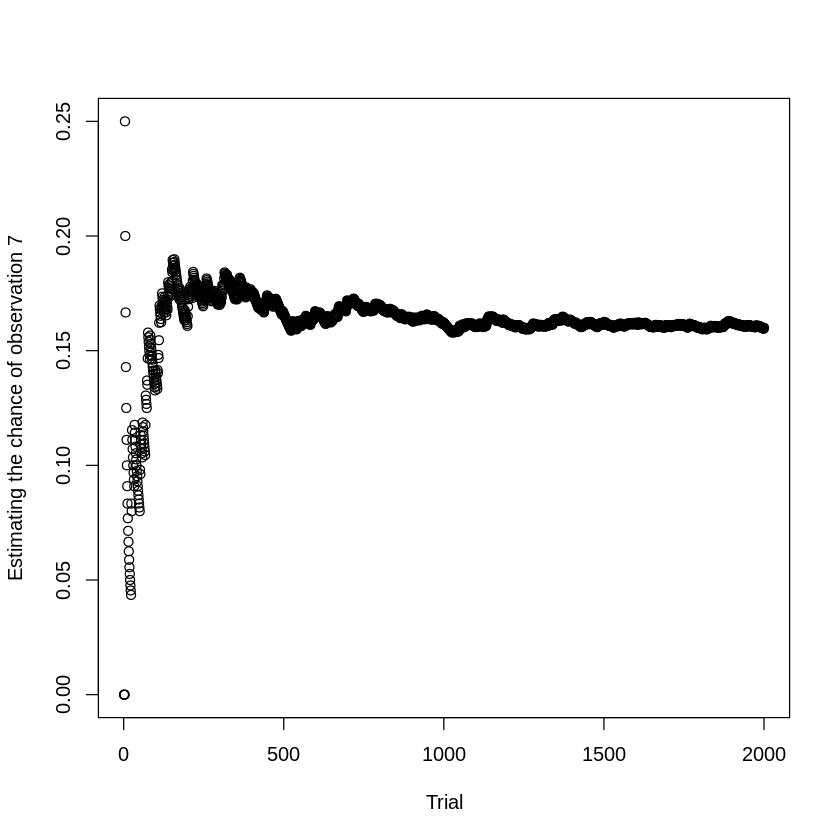

In [ ]:
observations[,"n"] = 0
resutls = c()
for(i in 1:2000) {
  obs = sum_of_n_dice(2)
  observations[toString(obs), 'n'] = observations[toString(obs), 'n'] + 1
  result = observations["7", "n"] / sum(observations[, "n"])
  resutls = c(resutls,result)
}
plot(resutls, xlab = "Trial", ylab = "Estimating the chance of observation 7")

<div dir='rtl'>
<font color='green'  background-color: blue>
برای واضح‌تر دیدن همگرایی، همچنین مشاهده اختلاف مسیر‌های همگرایی در تلاش‌های متفاوت، می‌توانیم آزمایش بالا را چندین بار تکرار کنیم و نمودار‌ها را کنار هم قرار دهیم.
</font>
</div>

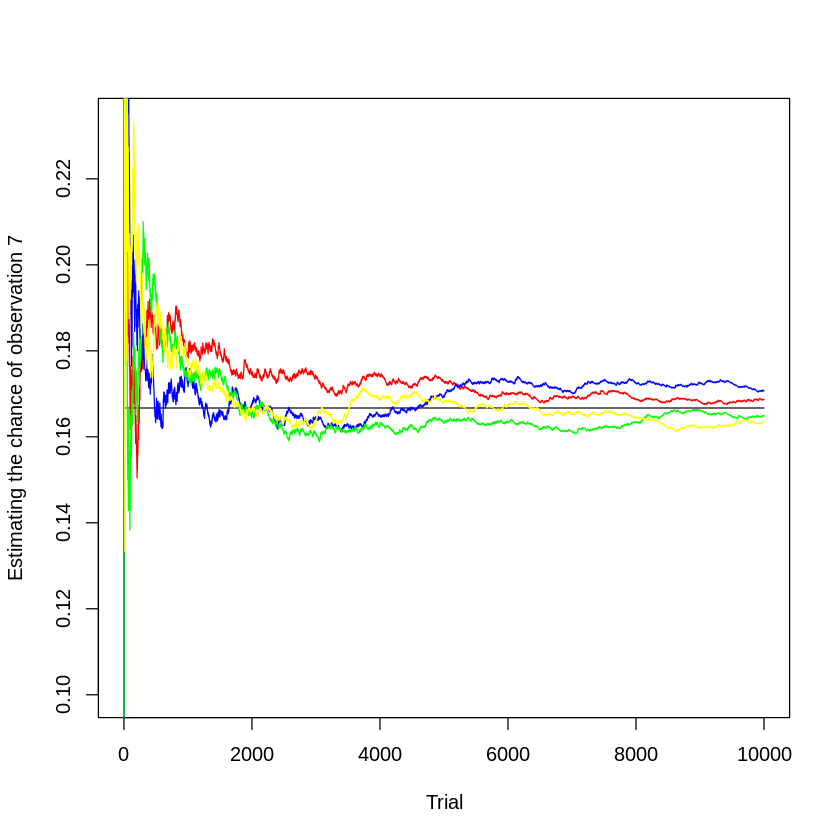

In [ ]:
times = 10000
colors = c('red', 'blue', 'green', 'yellow')
plot(rep(0.1667, times), xlab = "Trial", type = "l",
    ylab = "Estimating the chance of observation 7", col = 'black')
for(k in 1:4) {
  observations[, "n"] = 0
  resutls = c()
  for(i in 1:times) {
    obs = sum_of_n_dice(2)
    observations[toString(obs), 'n'] = observations[toString(obs), 'n'] + 1
    result = observations["7", "n"] / sum(observations[, "n"])
    resutls = c(resutls, result)
  }
  lines(resutls, col = colors[k])
}

#<a name='2'></a>
<div dir='rtl'>
<h1>2. مسئله‌ی Monty Hall</h1>
</div>

<div dir='rtl'>
همان‌طور که در درس بررسی شد، این مسئله نوعی معماست که توسط احتمالات می‌توان به بهترین استراتژی برای حل آن دست یافت.
بار دیگری آن را بررسی می‌کنیم.
سه در وجود دارد. پشت یکی از درها جایزه قرار داشته و پشت دو در دیگر دو
بز ایستاده‌اند.
مجری از شرکت‌ کننده می‌خواهد که یک در را انتخاب کند. پس از آن، مجری یکی از درها را که مطمئن است پشت آن جایزه وجود ندارد باز می‌کند. پس از آن از شرکت‌ کننده می‌خواهد یا تصمیم خود را نهایی کند و یا این‌ که دری که انتخاب کرده را با در باقی‌مانده عوض کند.
</div>

<div dir='rtl'>
در این تمرین سعی داریم با شبیه‌سازی تصمیم‌گیری در دو حالت بیان شده، بهترین استراتژی برای افزایش احتمال برد را بیابیم.
برای این مهم، ابتدا تابع شبیه‌سازی یک دور بازی را ایجاد می‌کنیم.
</div>

In [ ]:
# Inputs:
#    make_switch: TRUE or FALSE based on the given choice of the player.
#                 If TRUE, the player wants a switch.
# Output of function determines that the player is a winner or not.

simulate_game = function(make_switch = FALSE)
{
  n_doors = 3

  # Create a integer vector for the door indices.
  doors = seq_len(n_doors)

  # Create a boolean vector showing which doors are opened.
  # All doors are closed at the start of the game.
  is_closed = rep(TRUE, length=3)

  # Sample one index for the door to hide the prize behind.
  # From now on, we call it the prize door.
  prize_index = sample(doors, size=1)

  # Sample one index for the door initially chosen by the player.
  # This can be the same door as the prize door. So there is no need to
  # eliminate any door.
  choice_index = sample(doors, size=1)

  # Now Monty Hall opens the door the player did not choose.
  # If the player has already picked the prize door, the one remaining
  # closed door has a no prize.
  # If the player has not picked the prize door, the one remaining closed
  # door has the prize.
  if (prize_index == choice_index) {
    # If the player has the prize, Monty Hall has two options to choose from.
    # The door which the player has chosen (the prize door) needs to be
    # eliminated.
    is_closed[sample(doors[-prize_index], size=1)] = FALSE
  } else {
    # Else, Monty Hall has to open the one remaining door.
    # We eliminate the chosen and the prize door.
    is_closed[-c(prize_index, choice_index)] = FALSE
  }

  # Now Monty Hall asks the player whether he/she wants to make a switch
  if (make_switch) {
    # If the player decides to make a switch, then he/she has to pick
    # one of the closed doors.
    # We need to make sure it is not the one the player chose initially.
    choice_index = doors[is_closed][doors[is_closed] != choice_index]
  }

  # Return a boolean value showing whether the player's choice is the prize door
  # or not.
  return(choice_index == prize_index)
}

<div dir='rtl'>
حال تابعی می‌نویسیم که بازی را n بار انجام دهد.
</div>

In [ ]:
# Inputs:
#    make_switch: TRUE or FALSE based on the given choice of the player.
#                 If TRUE, the player wants a switch.
#    n: Number of games we want to simulate.
# Output of function determines that the player is a winner or not in all games.

simulate_n_games = function(n, make_switch = FALSE)
{
  return(vapply(rep(make_switch, n), simulate_game, logical(1)))
}

<div dir='rtl'>
بازی را ۱۰۰۰ بار انجام می‌دهیم و آن را در یک dataframe ذخیره می‌کنیم.
</div>

In [ ]:
n_games = 1000

# Simulate games and store the boolean results in both cases.
results_without_switching = simulate_n_games(n = n_games, make_switch = FALSE)
results_with_switching = simulate_n_games(n = n_games, make_switch = TRUE)

# Store the cumulative wins in a dataframe.
results = data.frame(
  # First column
  game = seq_len(n_games),
  # Second column
  cumulative_wins_without_switching = cumsum(results_without_switching),
  # Third column
  cumulative_wins_with_switching = cumsum(results_with_switching)
)

# Printing ten rows of stored data.
head(results, 10)

,game,cumulative_wins_without_switching,cumulative_wins_with_switching
,<int>,<int>,<int>
1,1,0,0
2,2,0,1
3,3,1,2
4,4,1,2
5,5,2,3
6,6,3,4
7,7,4,4
8,8,5,5
9,9,5,6


<div dir='rtl'>
حال می‌خواهیم نتایج را رسم کنیم تا دید بهتری نسبت به تعویض کردن/نکردن بدست آید.
برای این کار از پکیج "ggplot" استفاده می‌کنیم.
</div>

In [ ]:
install.packages('ggplot2')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



<div dir='rtl'>
به‌علاوه برای این که اعداد را به‌صورت درصد بیان کرده و به صورت مرتب‌تری نمایش داده شوند نیز تابعی جدید تعریف می‌کنیم.
</div>

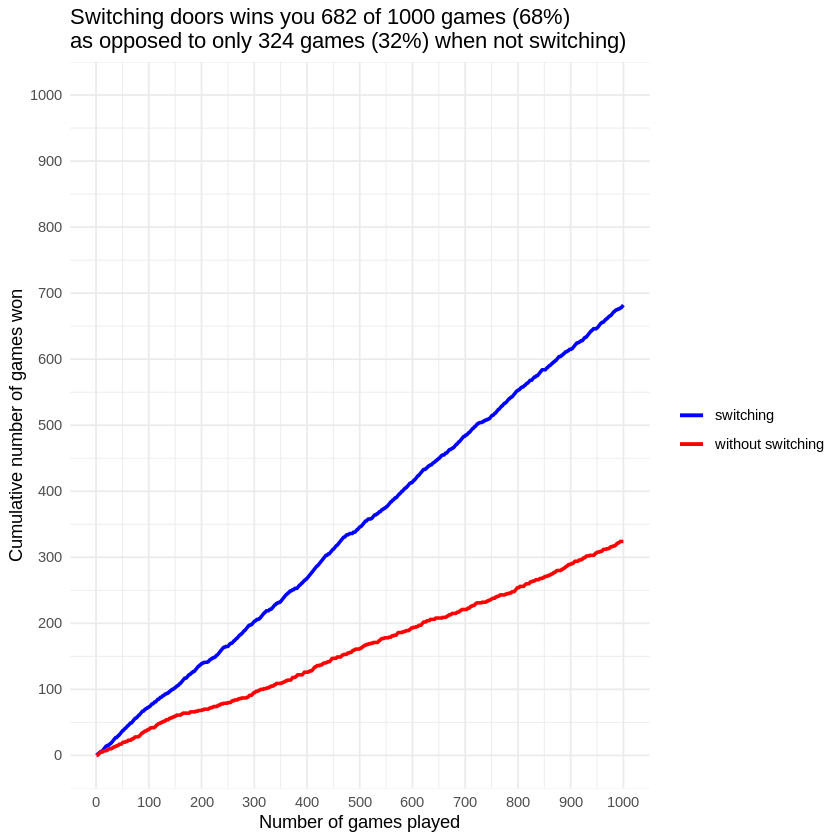

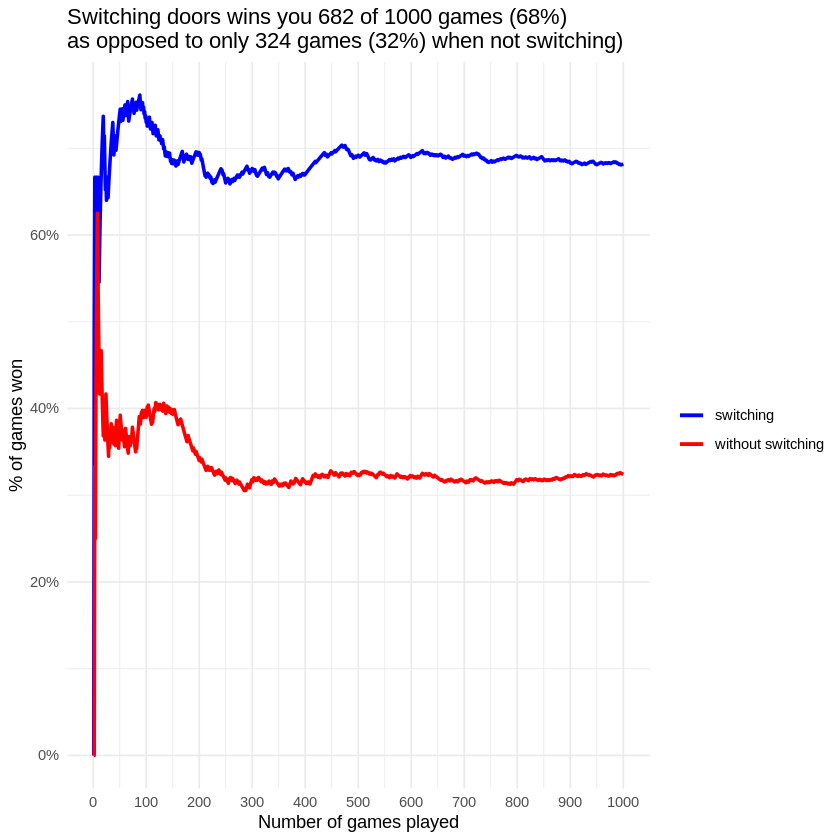

In [ ]:
library(ggplot2)

# Inputs:
#    values: Input numbers
# Output of function is the percenage form of the input number in a nice form.
format_percentage = function(values)
{
  return(paste0(formatC(values*100, digits=0, format='f'), '%'))
}

# Generate a title based on the results of the simulations
title = paste(
  paste0(
    'Switching doors wins you ', sum(results_with_switching), ' of ', n_games,
     ' games (', format_percentage(mean(results_with_switching)), ')'
     ),
  paste0(
    'as opposed to only ', sum(results_without_switching), ' games (',
    format_percentage(mean(results_without_switching)), ') when not switching)'),
  sep = '\n'
)


# Set some basic plotting parameters
# Size of the plotted lines
linesize = 1
# Breaks of the axes
x_breaks = y_breaks = seq(from=0, to=n_games, length.out=11)
# Limits of the y axis - makes y limits match x limits
y_limits = c(0, n_games)
# Make a named color scheme
palette = setNames(c('blue', 'red'), nm=c('switching', 'without switching'))

# Make a line plot of the cumulative wins with and without switching
ggplot(data=results) +
  geom_line(
    aes(x=game, y=cumulative_wins_with_switching, col=names(palette[1])),
    size=linesize
    ) +
  geom_line(
    aes(x=game, y=cumulative_wins_without_switching, col=names(palette[2])),
    size = linesize
    ) +
  scale_x_continuous(breaks=x_breaks) +
  scale_y_continuous(breaks=y_breaks, limits=y_limits) +
  scale_color_manual(values=palette) +
  theme_minimal() +
  theme(legend.background=element_rect(fill='white', color='transparent')) +
  labs(x='Number of games played') +
  labs(y='Cumulative number of games won') +
  labs(col = NULL) +
  labs(title = title)


# Make a line plot of the rolling % win chance with and without switching
ggplot(data=results) +
  geom_line(
    aes(x=game, y=cumulative_wins_with_switching/game, col=names(palette[1])),
    size=linesize
    ) +
  geom_line(
    aes(x=game, y=cumulative_wins_without_switching/game, col=names(palette[2])),
     size=linesize) +
  scale_x_continuous(breaks=x_breaks) +
  scale_y_continuous(labels=function(x) format_percentage(x)) +
  scale_color_manual(values=palette) +
  theme_minimal() +
  theme(legend.background=element_rect(fill='white', color='transparent')) +
  labs(x='Number of games played') +
  labs(y='% of games won') +
  labs(col=NULL) +
  labs(title=title)



<div dir='rtl'>
همان‌طور که دیده می‌شود، به نفع بازیکن است که انتخاب خود را تغییر دهد.
</div>

#<a name='3'></a>
<div dir='rtl'>
<h1>3. مدل‌های بیزی (Bayesian Models)</h1>
</div>

<div dir='rtl'>
پیش‌تر با قضیه بیز آشنا شدید:
$$
P(B|A) = \frac{P(A|B)P(B)}{P(A)}
$$
فرض کنید قصد داریم بر حسب مشاهداتی، پیش‌آمدی را حدس بزنیم (پیشگویی کنیم).
با قرار دادن $A$ به عنوان متغیر تصادفی گویای مشاهدات و $B$ به عنوان متغیر تصادفی گویای آنچه قصد پیشگویی آن را داریم، به سادگی می‌توان از قضیه بیز برای این مقصود استفاده کرد.
به مدل‌های یادگیری ماشین که از منطق بالا بهره می‌برند، مدل‌های بیزی گفته می‌شود.
در این بخش قصد داریم مثال‌های ساده‌ای از مدل‌های بیزی را بررسی کنیم.
</div>

<div dir='rtl'>
ما معمولا احتمال واقعی ر‌‌و‌ید‌ا‌د‌ها را نمی‌دانیم. به همین دلیل، معمولا در مدل‌های بیزی، احتمالات مورد نیاز تخمین زده می‌شوند. این تخمین‌ها می‌توانند منطق‌های متفاوتی داشته باشند. در این بخش، ما از تخمین احتمالات به کمک تعریف بسامدی استفاده می‌کنیم. مسئله به این شکل بیان خواهد شد که ما مجموعه‌ای از مشاهدات قبلی به همراه نتایج حاصل از آن‌ها را داریم و با استفاده از آن‌ها به تخمین احتمالات می‌پردازیم. سپس با استفاده از این تخمین‌ها، مدل بیزی را می‌سازیم و از این پس،
با استفاده از این مدل، می‌توانیم به ازای مشاهدات جدید، نتایج پیش رو را حدس بزنیم.
</div>

<div dir='rtl'>
مثال) قصد داریم با بررسی میزان مشارکت دانشجویان درس ریاضیات گسسته ترم اخیر و نمره‌ی امتحان نهایی آن‌ها، ارتباط بین این دو مولفه را بررسی کنیم. میزان مشارکت به معنای تعداد سوالاتی است که به عنوان تمرین، در طول آن نیمساعت تحویل داده شده است. برای سادگی، این عدد بر بیشینه تعداد ممکن تقسیم شده است. نمره امتحان نهایی نیز از ۱۰۰ محاسبه شده است. در این مثال، قصد داریم با برازش مدل‌های بیزی متفاوت و بررسی عملکرد آن‌ها، بهینه مرز میزان مشارکتی را پیدا کنیم که بتوانیم با توجه به آن، قبولی دانشجو را حدس بزنیم (قبولی به معنای نمره‌ی بزرگ‌تر یا مساوی ۵۰ است).
</div>

In [ ]:
# `c()` function creates a list.
follow_rate = c(
  0.259, 0.944, 0.676, 0.148, 0.546, 0.556, 0.833, 0.87 , 0.713, 0.704, 0.019,
  0.833, 0.778, 0.667, 0.944, 0.0  , 0.796, 0.935, 0.222, 0.806, 0.704, 0.769,
  0.731, 0.602, 0.704, 0.398, 0.815, 0.528, 0.602, 0.713, 0.769, 0.935, 0.824,
  0.398, 0.898, 0.37 , 0.537, 0.944, 0.778, 0.407, 0.954, 0.87 , 0.491, 0.824,
  0.491, 0.713, 0.935, 0.38 , 0.037, 0.963, 0.63 , 0.574, 0.907, 0.0  , 0.63 ,
  0.796, 0.917, 0.481, 0.824, 0.972, 0.954, 0.861, 0.713, 0.315, 0.963, 0.935,
  0.324, 0.944, 0.778, 0.861, 0.509
)
final_grade = c(
  0.0  , 54.0 , 46.5 , 0.0  , 37.0 , 9.0  , 56.5 , 42.3 , 70.5 , 76.5 , 0.0  ,
  37.5 , 57.5 , 62.0 , 87.5 , 0.0  , 94.5 , 75.6 , 14.5 , 41.1 , 91.5 , 90.5 ,
  73.0 , 68.0 , 52.0 , 19.5 , 65.5 , 51.0 , 64.0 , 39.0 , 79.3 , 66.0 , 69.5 ,
  33.8 , 44.5 , 51.9 , 38.8 , 52.2 , 45.0 , 66.5 , 64.5 , 56.7 , 0.0  , 87.0 ,
  27.5 , 63.7 , 49.0 , 16.2 , 0.0  , 84.2 , 53.5 , 80.5 , 37.5 , 0.0  , 87.5 ,
  56.0 , 74.5 , 85.5 , 70.0 , 88.5 , 69.5 , 83.8 , 61.5 , 32.0 , 65.5 , 78.0 ,
  47.5 , 73.0 , 79.2 , 76.0 , 0.0
)
# Dataframe is similar to a table which gets columns as input.
history = data.frame(follow_rate, final_grade)
# `head()` function displays top 5 data entries of the input dataframe.
head(history)

,follow_rate,final_grade
,<dbl>,<dbl>
1,0.259,0.0
2,0.944,54.0
3,0.676,46.5
4,0.148,0.0
5,0.546,37.0
6,0.556,9.0


<div dir='rtl'>
ابتدا نیم‌نگاهی به نمایش تصویری دادگان داشته باشیم:
</div>

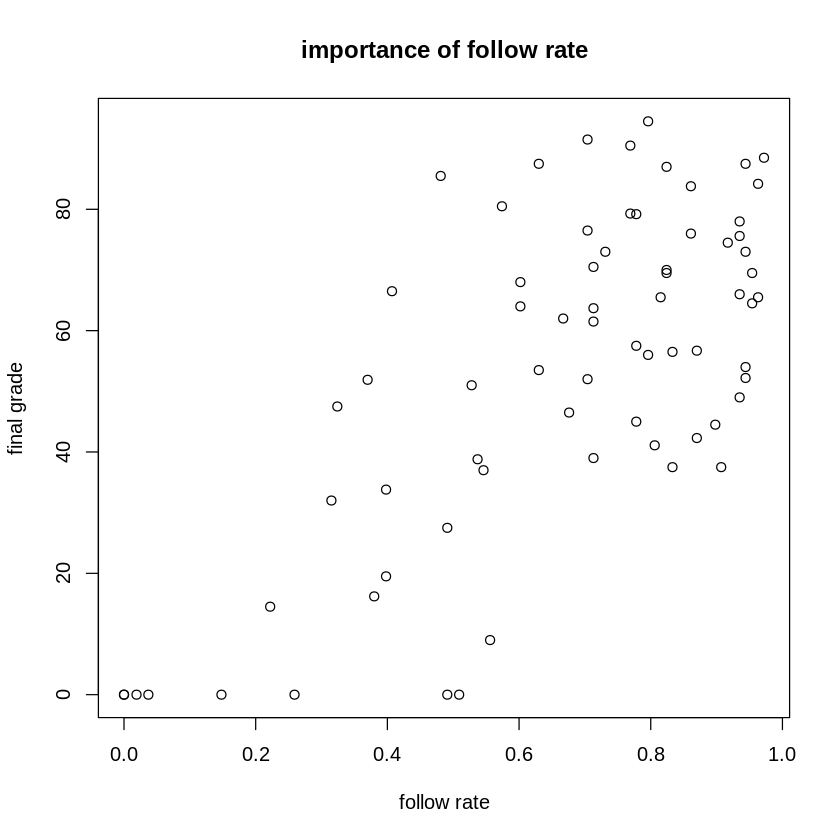

In [ ]:
plot(follow_rate, final_grade, main="importance of follow rate",
   xlab="follow rate", ylab="final grade")

# plot(x, y, main=<title>, xlab=<x axis label>, ylab=<y axis label>)

<div dir='rtl'>
ابتدا فرض کنید مرزی که به دنبال آن می‌گردیم مقدار ۰.۵ داشته باشد. نیاز است مدلی بیزی بر مبنای این مرز بنا کنیم. پس از ساخت مدل بیزی، سعی خواهیم کرد تا آن را به نحوی منعطف کنیم تا به ازای مرزهای متفاوت کار کند.
</div>

In [ ]:
threshold = 0.5

<div dir='rtl'>
در ستون نمرات نهایی، برای ما تنها مهم است که نمره قبولی دریافت شده یا خیر و نمره‌ی دقیق را نیاز نداریم. بنابراین میتوانیم این دادگان را به شکل باینری در بیاوریم.
همچنین در ستون میزان مشارکت، تنها مهم است میزان مشارکت از مرز موردنظر کوچک‌تر نباشد.
</div>

In [ ]:
binary_history = data.frame(follow_rate >= threshold, final_grade >= 50)
colnames(binary_history) <- c("followed","passed")
# `colnames(binary_history) <- c("followed","passed")` sets column names
head(binary_history)

,followed,passed
,<lgl>,<lgl>
1,FALSE,FALSE
2,TRUE,TRUE
3,TRUE,FALSE
4,FALSE,FALSE
5,TRUE,FALSE
6,TRUE,FALSE


<div dir='rtl'>
حال به محاسبه احتمالات مورد نیاز برای مدل بیزی می‌پردازیم. برای این امر، از تعریف کلاسیک احتمال بر روی مشاهدات
$binary_history$
استفاده می‌کنیم.
</div>

In [ ]:
# `dataframe$x` addresses the column = x of dataframe.
P_followed = sum(binary_history$followed) / length(binary_history$followed)
P_passed = sum(binary_history$passed) / length(binary_history$passed)

P_followed_if_passed =
  sum(binary_history[binary_history$passed == 1, ]$followed) /
  sum(binary_history$passed)
# Note: binary_history[binary_history$rainy==1,] makes a subset of
# binary_history which have rainy=1

P_followed_if_not_passed =
  sum(binary_history[binary_history$passed == 0, ]$followed) /
  length(binary_history[binary_history$passed == 0, ]$followed)

In [ ]:
# Based on Bayes' theorem theorem:
P_passed_if_followed = P_followed_if_passed * P_passed / P_followed
P_not_passed_if_followed = P_followed_if_not_passed * (1-P_passed) / P_followed
P_passed_if_not_followed = (1-P_followed_if_passed) * P_passed / (1-P_followed)
P_not_passed_if_not_followed = (1-P_followed_if_not_passed)*(1-P_passed) /
                                (1-P_followed)

<div dir='rtl'>
پس اگر شخصی بیشتر از 50 درصد در درس فعالیت داشته باشد،
طبق نتایج زیر می‌توانیم پیش‌گویی قبولی را برای او داشته باشیم:
</div>

In [ ]:
# cat is a function to make strings
cat("If we have a following student:\n")
cat("Probability of passing:", P_passed_if_followed, "\n")
cat("Probability of failing:", P_not_passed_if_followed, "\n")

If we have a following student:
Probability of passing: 0.7592593 
Probability of failing: 0.2407407 


<div dir='rtl'>
همچنین اگر دانشجویی مشارکت کمتر از 50 درصد داشته باشد،
طبق نتایج زیر می‌توانیم پیش‌گویی عدم قبولی داشته باشیم:
</div>

In [ ]:
cat("If we have a not following student:\n")
cat("Probability of passing:", P_passed_if_not_followed, "\n")
cat("Probability of no passing:", P_not_passed_if_not_followed, "\n")

If we have a not following student:
Probability of passing: 0.1764706 
Probability of no passing: 0.8235294 


<div dir='rtl'>
در ادامه سعی بر آن خواهیم داشت تا تابعی برای انجام محاسبات بالا آماده کنیم.
</div>

In [ ]:
# Inputs:
#    observations: a data.frame such as history containing two columns:
#                 1. column y: what we want to predict in future.
#                 2. column x: what we want to predict based on.
#    x: name of column x in observations
#    y: name of column y in observations
#    situation: x value of new situation that we want to predict the
#              corresponding y
#
# The function assumes that x and y are just 0 or 1.
#
# Output of function determines that the corresponding y for the input
# situation, whether it is equal to 1 or not.

# `nrow()` function returns number of rows in the input dataframe.
bayes_prediction = function(situation, observations, x, y) {
  P_x = sum(observations[x]) / nrow(history)
  P_y = sum(observations[y]) / nrow(history)
  P_x_if_y = sum(observations[observations[y] == 1, ][x]) /
             sum(observations[y])
  P_x_if_not_y = sum(observations[observations[y] == 0, ][x]) /
                 nrow(observations[observations[y] == 0, ])
  if (situation == 1) {
    P_true = P_x_if_y * P_y / P_x
    P_false = P_x_if_not_y * (1-P_y) / P_x
    return (P_true > P_false)
  } else {
    P_true = (1-P_x_if_y) * P_y / (1-P_x)
    P_false = (1-P_x_if_not_y) * (1-P_y) / (1-P_x)
    return (P_true > P_false)
  }
}

bayes_prediction(1, binary_history, x = "followed", y = "passed")
bayes_prediction(0, binary_history, x = "followed", y = "passed")

[1] TRUE

[1] FALSE

<div dir='rtl'>
اگر بیشتر به نحوه‌ی عملکرد مدل‌های بیزی دقت کنیم، می‌بینیم که پیشگویی‌های این مدل‌ها بر مبنای مقایسه‌ی احتمال حالات در شرایطی خاص است؛ به نحوی که برای هر پیشگویی، با استفاده از قضیه‌ی بیز، به ازای هر پاسخ ممکن یک احتمال محاسبه شده و پاسخ دارای احتمال بیشینه به عنوان پیشگویی درنظر گرفته خواهد شد.
بنابراین در هر پیشگویی، مخرج کسر در رابطه‌ی بیز، در محاسبه‌ی تمام احتمالات یکسان است (با توجه به اینکه برای یک مشاهده‌ی خاص قصد پیشگویی داریم، عامل مربوط به آن پیش‌آمد خاص در تمام حالات ممکن یکسان است). درنتیجه، چون تنها مقایسه‌ی این مقادیر برای ما با اهمیت است،
به سادگی می‌توان این مقدار را نادیده گرفت و در محاسبات وارد نکرد.
</div>

In [ ]:
bayes_prediction = function(situation, observations, x, y) {
  P_y = sum(observations[y]) / nrow(observations)
  P_x_if_y = sum(observations[observations[y] == 1, ][x]) /
             sum(observations[y])
  P_x_if_not_y = sum(observations[observations[y] == 0, ][x]) /
                 nrow(observations[observations[y] == 0, ])
  if (situation == 1) {
    P_true = P_x_if_y * P_y
    P_false = P_x_if_not_y * (1-P_y)
    return (P_true > P_false)
  } else {
    P_true = (1-P_x_if_y) * P_y
    P_false = (1-P_x_if_not_y) * (1-P_y)
    return (P_true > P_false)
  }
}

bayes_prediction(1, binary_history, x = "followed", y = "passed")
bayes_prediction(0, binary_history, x = "followed", y = "passed")

[1] TRUE

[1] FALSE

<div dir='rtl'>
به مسائلی همچون مسائل بالا که با داشتن اطلاعاتی، قصد داریم مابین چند گزینه روی میز، یکی را برگزینیم، مسائل طبقه‌بندی یا classifying گفته می‌شود.
به مدل‌هایی مانند مدل بالا که این مسائل را حل می‌کنند، مدل‌های طبقه‌بند یا classifier
می‌گویند. به هر یک از پاسخ‌های ممکن در این مسائل، یک طبقه یا class گفته می‌شود.
مسئله بالا دارای دو طبقه قبولی یا ردی دانشجو در امتحان نهایی بود.
مسائل طبقه‌بندی می‌توانند دارای تعداد بیشتری طبقه باشند. توسعه مدل بالا برای پیشگویی بین طبقات بیشتر کار ساده‌است. کافیست تعداد احتمالات بیشتری را با کمک قضیه‌ی بیز محاسبه کنیم.
بد نیست اگر در مسئله بالا، نمره نهایی را به سه بازه تقسیم کنید و با دست بردن در صورت سوال، مسئله و پاسخش را برای این حالت نیز گسترش دهید.
</div>

<div dir='rtl'>
به متغیر‌های تصادفی مانند میزان مشارکت در مسئله اخیر، که برای پیشگویی مورد استفاده قرار می‌گیرند، متغیر‌های پیشگو، کمکی، predictor یا feature گفته می‌شود. مسئله بالا دارای تنها یک متغیر پیشگو بود اما تعداد این متغیر‌ها می‌تواند بسیار زیاد‌تر باشد.
همچنین در مسئله بالا، متغیر پیشگو را باینری درنظر گرفتیم.
اما این متغیر می‌تواند تنوع مقادیر بیشتری داشته باشد یا حتی
دارای مقادیر پیوسته باشد که این شرایط را در آینده بررسی خواهیم کرد.
</div>

<div dir='rtl'>
حال به حل مسئله اصلی، یعنی پیدا کردن کمینه میزان مشارکت که مدل بیز به ازای آن پیشگویی قبولی می‌کند می‌پردازیم. برای این امر، ابتدا تابعی آماده می‌کنیم تا با دریافت مرز میزان مشارکت، دادگان میزان مشارکت را باینری کند.
</div>

In [ ]:
history_to_binary = function(history, threshold) {
    binary_history = data.frame(
      history$follow_rate >= threshold,
      history$final_grade >= 50
    )
    colnames(binary_history) <- c("followed","passed")
    return (binary_history)
}

head(history_to_binary(history, 0.3))

,followed,passed
,<lgl>,<lgl>
1,FALSE,FALSE
2,TRUE,TRUE
3,TRUE,FALSE
4,FALSE,FALSE
5,TRUE,FALSE
6,TRUE,FALSE


<div dir='rtl'>
بنابراین می‌توانیم با کنار هم قرار دادن دو تابع بالا، پیشگویی‌هایی با مرز‌های مختلف داشته باشیم:
</div>

In [ ]:
cat("If someone has less than 70% contribution, they probably will pass:",
  bayes_prediction(
    0, history_to_binary(history, 0.7),
    x = "followed", y = "passed"
  )
)

cat("\nIf someone has less than 80% contribution, they probably will pass:",
  bayes_prediction(
    0, history_to_binary(history, 0.8),
    x = "followed", y = "passed"
  )
)

If someone has less than 70% contribution, they probably will pass: FALSE
If someone has less than 80% contribution, they probably will pass: TRUE

<div dir='rtl'>
حال لازم است مرزی را پیدا کنیم که پیشگویی‌های به وسیله آن، بیشترین مطابقت را با مشاهدات فعلی‌مان داشته باشد. برای این کار نیاز به تابعی داریم که میزان این تطابق را محاسبه کند:
</div>

In [ ]:
accuracy = function(binary_history) {
    matchs_no = 0
    # Loop over dataframe:
    for (row in 1:nrow(binary_history)) {
        followed = binary_history[row, "followed"]
        passed = binary_history[row, "passed"]

        prediction = bayes_prediction(
          followed, binary_history, x = "followed", y = "passed"
        )
        matchs_no = matchs_no + (prediction == passed)
    }
    return (matchs_no/nrow(binary_history))
}

cat("accuracy of threshold = 0.5 is", accuracy(history_to_binary(history, 0.5)))

accuracy of threshold = 0.5 is 0.7746479

<div dir='rtl'>
حال با اجرای یک حلقه تکرار بر روی مقادیر مختلف مرز مشارکت، بهینه مرز مشارکتی را پیدا می‌کنیم که پیشگویی بر مبنای آن بیشترین تطابق را با دادگان ما خواهد داشت. میزان دقت این جستجو را 0.01 قرار خواهیم داد.
</div>

In [ ]:
best_accuracy = -1
best_threshold = -1

for (thr in 0:100) {
  threshold = 0.01 * thr
  acc = accuracy(history_to_binary(history, threshold))
  if (acc > best_accuracy) {
    best_accuracy = acc
    best_threshold = threshold
  }
}

cat(
  "The best accuracy is", best_accuracy,
  "corresponding to the threshold", best_threshold
)

The best accuracy is 0.8169014 corresponding to the threshold 0.56

#<a name='4'></a>
<div dir='rtl'>
<h1>4. مدل بیز ساده‌لوح (Naive Bayesian Models)</h1>
</div>

<div dir='rtl'>
در بخش دوم با مدل‌های بیزی آشنا شدید. در پایان آن بخش گفته شد که تعداد متغیر‌های پیشگو می‌تواند بیشتر از یکی باشد. در این بخش قصد بررسی این حالت از مسائل را داریم. مسئله‌ای را مطرح می‌کنیم ک دارای دو متغیر پیشگو باشد.
</div>

<div dir='rtl'>
مثال) شرایط سوال بخش دوم را درنظر بگیرید. قصد داریم با اضافه کردن معیاری جدید مبنی بر تعداد دفعات مشارکت دانشجو در امر تقلب، سعی کنیم مدل بیز قوی‌تری بسازیم. برای ساده سازی، مرز یافته شده در بخش قبل برای میزان مشارکت (0.56) را در این بخش درنظر گرفته و آن را تغییر نخواهیم داد. در ادامه به یافتن بهترین مرز تعداد تقلب‌ها خواهیم پرداخت به نحوی که با اعمال این مرز برای تبدیل اطلاعات به شکل باینری، به بهترین بازدهی برسیم.
</div>

In [ ]:
follow_rate = c(
  0.259, 0.944, 0.676, 0.148, 0.546, 0.556, 0.833, 0.87 , 0.713, 0.704, 0.019,
  0.833, 0.778, 0.667, 0.944, 0.0  , 0.796, 0.935, 0.222, 0.806, 0.704, 0.769,
  0.731, 0.602, 0.704, 0.398, 0.815, 0.528, 0.602, 0.713, 0.769, 0.935, 0.824,
  0.398, 0.898, 0.37 , 0.537, 0.944, 0.778, 0.407, 0.954, 0.87 , 0.491, 0.824,
  0.491, 0.713, 0.935, 0.38 , 0.037, 0.963, 0.63 , 0.574, 0.907, 0.0  , 0.63 ,
  0.796, 0.917, 0.481, 0.824, 0.972, 0.954, 0.861, 0.713, 0.315, 0.963, 0.935,
  0.324, 0.944, 0.778, 0.861, 0.509
)
final_grade = c(
  0.0  , 54.0 , 46.5 , 0.0  , 37.0 , 9.0  , 56.5 , 42.3 , 70.5 , 76.5 , 0.0  ,
  37.5 , 57.5 , 62.0 , 87.5 , 0.0  , 94.5 , 75.6 , 14.5 , 41.1 , 91.5 , 90.5 ,
  73.0 , 68.0 , 52.0 , 19.5 , 65.5 , 51.0 , 64.0 , 39.0 , 79.3 , 66.0 , 69.5 ,
  33.8 , 44.5 , 51.9 , 38.8 , 52.2 , 45.0 , 66.5 , 64.5 , 56.7 , 0.0  , 87.0 ,
  27.5 , 63.7 , 49.0 , 16.2 , 0.0  , 84.2 , 53.5 , 80.5 , 37.5 , 0.0  , 87.5 ,
  56.0 , 74.5 , 85.5 , 70.0 , 88.5 , 69.5 , 83.8 , 61.5 , 32.0 , 65.5 , 78.0 ,
  47.5 , 73.0 , 79.2 , 76.0 , 0.0
)
fraud_count = c(
  0 , 0 , 0 , 0 , 0 , 0 , 10, 0 , 39, 56, 0 ,
  0 , 11, 2 , 6 , 0 , 31, 0 , 0 , 0 , 33, 20,
  35, 12, 0 , 5 , 2 , 0 , 54, 0 , 3 , 0 , 19,
  6 , 0 , 0 , 10, 0 , 0 , 0 , 0 , 20, 44, 21,
  0 , 28, 0 , 0 , 0 , 3 , 0 , 46, 0 , 0 , 45,
  0 , 0 , 61, 6 , 3 , 2 , 0 , 23, 12, 0 , 0 ,
  0 , 0 , 25, 15, 0
)
history = data.frame(follow_rate, final_grade, fraud_count)
head(history)

,follow_rate,final_grade,fraud_count
,<dbl>,<dbl>,<dbl>
1,0.259,0.0,0
2,0.944,54.0,0
3,0.676,46.5,0
4,0.148,0.0,0
5,0.546,37.0,0
6,0.556,9.0,0


<div dir='rtl'>
ابتدا نیم‌نگاهی به نمایش تصویری دادگان داشته باشیم:
</div>

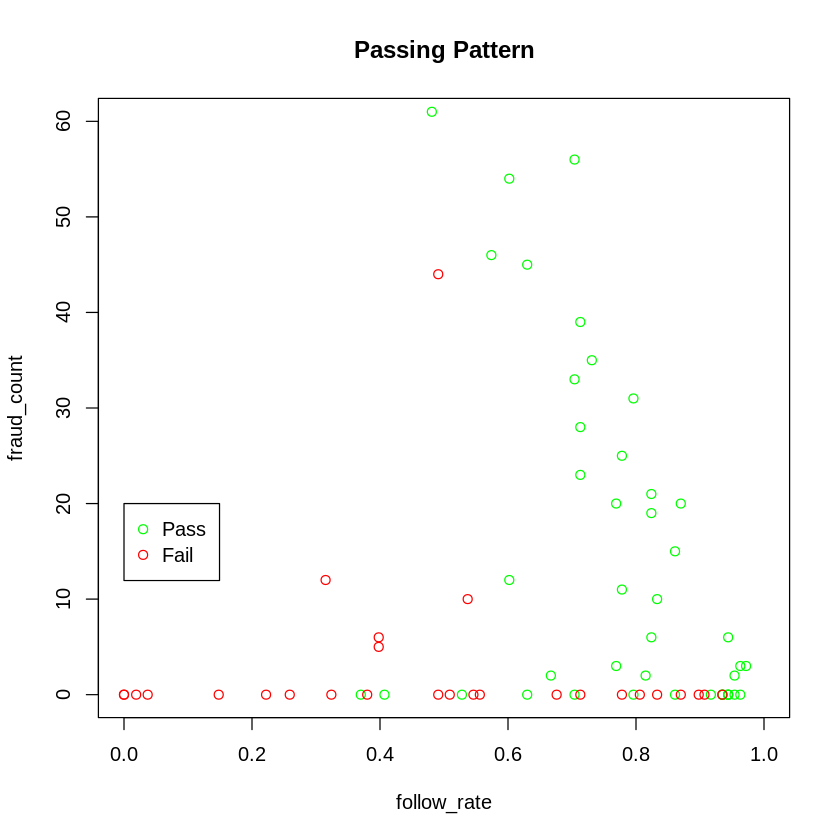

In [ ]:
plot(history[history$final_grade>=50, ]$follow_rate,
      history[history$final_grade>=50, ]$fraud_count,
      col = 'green', xlim = c(0, 1), ylim = c(0, 60),
      xlab = "follow_rate", ylab = "fraud_count", main = "Passing Pattern")
points(history[history$final_grade<50, ]$follow_rate,
      history[history$final_grade<50, ]$fraud_count,
      col = 'red')
legend(0, 20, legend=c("Pass", "Fail"),
       col=c("green", "red"), pch=c(1,1))

<div dir='rtl'>
مشاهده می‌شود که بر خلاف پیشفرض انتظارات، اکثر کسانی که مرتکب تقلب شده‌اند دارای نمرات بالاتر و شانس بیشتری برای قبولی بوده‌اند. این رفتار می‌تواند به این دلیل باشد که کسانی مرتکب تقلب می‌شوند که بیشتر به دانشگاه و نمرات حساسیت نشان می‌دهند. مطابق با بخش دوم، تابع زیر را برای تبدیل دادگان خود به حالت باینری تهیه می‌کنیم:
</div>

In [ ]:
history_to_binary = function(history, fraud_threshold) {
    binary_history = data.frame(
      history$follow_rate >= 0.56,
      history$final_grade >= 50,
      history$fraud_count >= fraud_threshold
    )
    colnames(binary_history) <- c("followed","passed","fraud")
    return (binary_history)
}

head(history_to_binary(history, 20))

,followed,passed,fraud
,<lgl>,<lgl>,<lgl>
1,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE
3,TRUE,FALSE,FALSE
4,FALSE,FALSE,FALSE
5,FALSE,FALSE,FALSE
6,FALSE,FALSE,FALSE


<div dir='rtl'>
حال نیاز است منطق مدل بیزی خود را به نحوی توسعه دهیم که با بیش از یک متغیر پیشگو نیز کار کند. ما از نحوه ارتباط دو متغیر پیشگو خود اطلاعی نداریم. برای ساده سازی فرض می‌کنیم این دو متغیر، به شرط متغیر پاسخ مستقل باشند. به مدل بیزی که از این فرض ساده‌سازی کمک بگیرد، مدل بیزی ساده‌لوح یا Naive Bayes Model گفته می‌شود.
اگر فرض کنیم دو متغیر پیشگوی ما به شرط متغیر پاسخ مستقل‌اند، با نام‌گذاری $X_1$ به عنوان متغیر پیشگو اول، $X_2$ به عنوان متغیر پیشگو دوم و $Y$ به عنوان متغیر پاسخ، به سادگی می‌توان نوشت:
$$
X = (X_1, X_2)\\
Bayes' Theorm: P(Y|X) = \frac{P(X|Y)P(Y)}{P(X)} \\
= \frac{P(X1|Y)P(X2|Y)P(Y)}{P(X)}
$$
که همانطور که قبلا بیان شد، در مدل‌های بیزی مقایسه اهمیت دارد و می‌توان از مخرج کسر بالا صرف‌نظر کرد، پس متغیر موردنظر ما برای پیشگویی عبارت است از:
$$
P(X1|Y)P(X2|Y)P(Y)
$$
با منطقی مشابه، در مدل‌های بیزی ساده‌لوح، می‌توان معادله مذکور را برای هر تعداد متغیر پیشگو با فرض استقلال شرطی مذکور تعمیم داد.
</div>

In [ ]:
bayes_prediction = function(situation1, situation2, observations, x1, x2, y) {
  P_y = sum(observations[y]) / nrow(observations)
  P_x1_if_y = sum(observations[observations[y]==1,][x1]) /
              sum(observations[y])
  P_x2_if_y = sum(observations[observations[y]==1,][x2]) /
              sum(observations[y])
  P_x1_if_not_y = sum(observations[observations[y] == 0,][x1]) /
                  nrow(observations[observations[y] == 0,])
  P_x2_if_not_y = sum(observations[observations[y] == 0,][x1]) /
                  nrow(observations[observations[y] == 0,])
  if (situation1 == 1 && situation2 == 1) {
    P_true = P_x1_if_y * P_x2_if_y * P_y
    P_false = P_x1_if_not_y * P_x2_if_not_y * (1-P_y)
    return (P_true > P_false)
  } else if (situation1 == 1 && situation2 == 0) {
    P_true = P_x1_if_y * (1-P_x2_if_y) * P_y
    P_false = P_x1_if_not_y * (1-P_x2_if_not_y) * (1-P_y)
    return (P_true > P_false)
  } else if (situation1 == 0 && situation2 == 1) {
    P_true = P_x2_if_y * (1-P_x1_if_y) * P_y
    P_false = P_x2_if_not_y * (1-P_x1_if_not_y) * (1-P_y)
    return (P_true > P_false)
  } else {
    P_true = (1-P_x1_if_y) * (1-P_x2_if_y) * P_y
    P_false = (1-P_x1_if_not_y) * (1-P_x2_if_not_y) * (1-P_y)
    return (P_true > P_false)
  }
}

In [ ]:
cat("If someone has more than 56% contribution",
    "and makes frauds more than 50 times,",
    "they probably will pass:",
    bayes_prediction(
      1, 1, history_to_binary(history, 50),
      x1 = "followed", x2 = "fraud", y = "passed"
    )
)

cat("\nIf someone has more than 56% contribution",
    "and makes frauds less than 50 times,",
    "they probably will pass:",
    bayes_prediction(
      1, 0, history_to_binary(history, 50),
      x1 = "followed", x2 = "fraud", y = "passed"
    )
)

If someone has more than 56% contribution and makes frauds more than 50 times, they probably will pass: FALSE
If someone has more than 56% contribution and makes frauds less than 50 times, they probably will pass: TRUE

<div dir='rtl'>
در بخش دوم، تابع محاسبه بازدهی را با استفاده از حلقه تکرار پیاده‌سازی کردیم درحالی که در بخش اول گفته شد استفاده از حلقه تکرار بسیار غیر بهینه است. بنابراین در این بخش سعی خواهیم کرد به کمک توابعی که در بخش سوم با آن‌ها آشنا شدیم، تابع مذکور را به صورتی بهینه‌تر بازنویسی کنیم.
</div>

In [ ]:
accuracy = function(binary_history) {
    bayes_prediction_over_the_binary_history = function(situation1, situation2){
        return (
            bayes_prediction(
                situation1,
                situation2,
                observations = binary_history,
                x1 = "followed",
                x2 = "fraud",
                y = "passed"
            )
        )
    }
    predictions = mapply(
        bayes_prediction_over_the_binary_history,
        binary_history$followed,
        binary_history$fraud
    )
    matchs_no = sum(predictions == binary_history$passed)
    return (matchs_no/nrow(binary_history))
}

cat("accuracy of threshold = 50 is", accuracy(history_to_binary(history, 50)))

accuracy of threshold = 50 is 0.7887324

In [ ]:
accuracy_of_the_model_using_fraud_threshold = function(threshold) {
    return (accuracy(history_to_binary(history, threshold)))
}
accuracies = mapply(accuracy_of_the_model_using_fraud_threshold, seq(0:60)-1)
# `mapply()` is a function to run another function over serries of inputs.

In [ ]:
best_accuracy = max(accuracies)
best_threshold <- which.max(accuracies)-1
# -`which.max()` is a function to find index of the maximum value in input.

cat(
  "The best accuracy is", best_accuracy,
  "corresponding to the fraud threshold", best_threshold
)

The best accuracy is 0.8169014 corresponding to the fraud threshold 0

<div dir='rtl'>
بنابراین مشاهده می‌کنیم که به ازای هیچ مرزی، تعداد تقلب‌ها نتوانست ما را در پیشگویی قبولی یا ردی دانشجویان یاری کند. اما این نتیجه قابل اطمینان نیست چراکه تمام آزمایش‌های ما به شرط قبول مرز 0.56 برای میزان مشارکت بود که این مقدار بدون درنظر گرفتن مقوله تقلب پیدا شده بود. بنابراین ممکن از با درنظر گرفتن تغییرات همزمان هر دوی این متغیر‌های پیشگو، به نتایج بهتری دست یابیم. این امر را بررسی می‌کنیم.
</div>

In [ ]:
history_to_binary = function(history, follow_threshold, fraud_threshold) {
    binary_history = data.frame(
      history$follow_rate >= follow_threshold,
      history$final_grade >= 50,
      history$fraud_count >= fraud_threshold
    )
    colnames(binary_history) <- c("followed","passed","fraud")
    return (binary_history)
}

In [ ]:
accuracy_of_the_model_using_thresholds = function(
    follow_threshold,
    fraud_threshold
) {
    return (accuracy(history_to_binary(history, follow_threshold,
    fraud_threshold)))
}

accuracy_of_the_model_using_threshold_ranges = function(
    follow_threshold,
    fraud_threshold
) {
    return (mapply(
        accuracy_of_the_model_using_thresholds,
        follow_threshold,
        fraud_threshold
    ))
}

accuracies = outer(
    (seq(0:100)-1)/100,
    seq(0:60)-1,
    accuracy_of_the_model_using_threshold_ranges
)
# `outer()` is a function to run another function over serries of inputs.
# Try to find out the difference between `outer` and `mapply`.

# This cells might take several minutes.

In [ ]:
argmax = which(accuracies == max(accuracies), arr.ind=TRUE)[1,]
# `which` returns indexes of True values in a matrix
cat("\nThe best accuracy has been achived in thresholds", (argmax[1]-1)/100,
    "for the follow rate and", (argmax[2]-1), "for the fraud count.",
    "\nThe best accuracy is", accuracies[argmax[1],argmax[2]])


The best accuracy has been achived in thresholds 0.56 for the follow rate and 0 for the fraud count. 
The best accuracy is 0.8169014

<div dir='rtl'>
باز هم به نتیجه یکسانی رسیدیم. این نتیجه با توجه به نمودار رسم شده در اول این بخش، مورد انتظار است. با اینحال سعی کنید مسیر طی شده را به دقت بررسی کنید. این مسیر دارای جزئیات زیادی است.
</div>

<div dir='rtl'>
<h3>naiveBayes in R</h3>
مدل بیز ساده‌لوح، کاربرد زیادی دارد. درنتیجه در کتابخانه زیر آماده شده است که از این پس از آن استفاده خواهیم کرد. نحوه استفاده از این کتاب‌خانه را با حل دوباره مسئله بالا نشان خواهیم داد:
</div>

In [ ]:
# You can install new packages like this:
install.packages("e1071")
# You can import new libraries lile this:
library(e1071)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘proxy’




In [ ]:
# It's how you can build a "naiveBayes" model.
# `passed	 ~ followed + fraud` means that the model should
# predict "rainy" column using "cloudy" and "temperature19" predictors.
# `data = history` means that model should use "history" dataframe as it's base
# dataframe.
model <- naiveBayes(passed ~ followed + fraud,
                    data = history_to_binary(history, 0.56, 50))
# using model's name, you can see model detail
model


Naive Bayes Classifier for Discrete Predictors

Call:
naiveBayes.default(x = X, y = Y, laplace = laplace)

A-priori probabilities:
Y
    FALSE      TRUE 
0.3802817 0.6197183 

Conditional probabilities:
       followed
Y            FALSE       TRUE
  FALSE 0.66666667 0.33333333
  TRUE  0.09090909 0.90909091

       fraud
Y            FALSE       TRUE
  FALSE 1.00000000 0.00000000
  TRUE  0.93181818 0.06818182


In [ ]:
test = data.frame("followed" = c(T, T, F, F), "fraud" = c(T, F, T, F))
# Just like bellow, you can make your prediction using your model.
# Ignore `type = "raw"` option for now. We will discuss about other types later.
prediction = predict(model, test, type = "raw")
# Output of this function will be corresponding probabilities for each class.
# Each row of the output is corresponding result for each row of prediction
# input (here, `test` dataframe).
prediction

FALSE,TRUE
0.003289146,0.9967109
0.194499018,0.8055010
0.061913696,0.9380863
0.828451883,0.1715481


In [ ]:
# Like bellow, we can compute predicted class for each row.
# By answering this question, we can find the logic of this prediction:
# In each row, which column has the greatest probability?
predicted_classes = colnames(prediction)[apply(prediction, 1, which.max)]
# -`apply()` is a function to run another function on each column or row of a
#   datafram. Second input of this function determines that the input function
#   should be applied on each row or column.
# -`apply(prediction,1,which.max)` means: find index of the column with maximum
#   value, for each row of "prediction" dataframe.
# -`colnames()` returns column names of the input dataframe.
# -`colnames(prediction)[indexes]` means: translates `indexes` to corresponding
#   column names.
predicted_classes

[1] "TRUE"  "TRUE"  "TRUE"  "FALSE"

<div dir='rtl'>
همانطور که مشاهده کردید، نتایج حاصل با نتایجی که تابع ما فراهم کرده بود یکسان است. حال که نحوه ساخت مدل‌های بیزی ساده لوح در R را یادگرفتیم،
بد نیست حالت‌های مختلفی از مسئله را تعریف کنیم و آن‌ها را با استفاده از این روش حل کنیم.

*   مسئله‌ای با تعداد بیشتری متغیر پیشگو؛
*   مسئله‌ای با تعداد بیشتری طبقه؛
*   مسئله‌ای مشابه آن‌چه حل شد، با این تفاوت که بجای آن که میزان مشارکت در درس را به دو دسته کوچکتر از ۱۹ و غیر آن تقسیم کنیم، آن را به تعداد سه یا بیشتر حالت تقسیم کنیم؛ به عنوان مثال مشارکت کمتر از ۱۷ درصد، بیشتر از 60 درصد و مابین این دو. برای حل این مسئله کافیست متغیر پیشگو گسسته جدیدی که بجای دما استفاده می‌کنیم، بجای دو مقدار صفر و یک، یک مقدار سوم (مانند ۲) نیز اخذ کند. تابع ما این حالت متغیر را نمی‌پذیرفت اما کتابخانه‌ی معرفی شده این مسئله را نیز حل می‌کند. خوب است اگر سعی کنید معادله‌ی مورد استفاده در مدلی که این مسئله را حل می‌کند را توسعه دهید. منطق مورد استفاده مانند آنچه است که تا الان دیدید.
</div>

<div dir='rtl'>
<font color='green'>
<h3><font color='green'>اگر مشتاق مشاهده بیشتر هستید، ادامه دهید:</font></h3>
قصد داریم نحوه طبقه‌بندی مدل‌های بیزی را به صورت بصری مشاهده کنیم.
کد‌های این قصمت توضیح داده نخواهند شد.
</font>
</div>

In [ ]:
df = data.frame(row.names = seq(1, 100 * 100))
df['x1'] = rep(seq(100), 100)
df['x2'] = rep(seq(100), each = 100)
# `each=3` means repeat each element 3 times
df['y'] = (df['x2'] / 100) > ((df['x1'] / 100) + 0.1) ^ 3

In [ ]:
train_size = floor(0.75 * nrow(df))
set.seed(100)
train_ind = sample(seq_len(nrow(df)), size = train_size)
train = df[train_ind, ]
test = df[-train_ind, ]

In [ ]:
model <- naiveBayes(y ~ x1 + x2, data = train)

In [ ]:
prediction = predict(model, test, type = "raw")
prediction = as.data.frame(prediction)
prediction["predicted_class"] = prediction["TRUE"] > prediction["FALSE"]
head(prediction)

,FALSE,TRUE,predicted_class
,<dbl>,<dbl>,"<lgl[,1]>"
1,0.0008823338,0.9991177,TRUE
2,0.0021315200,0.9978685,TRUE
3,0.0035618805,0.9964381,TRUE
4,0.0042154203,0.9957846,TRUE
5,0.0069298106,0.9930702,TRUE
6,0.0081554733,0.9918445,TRUE


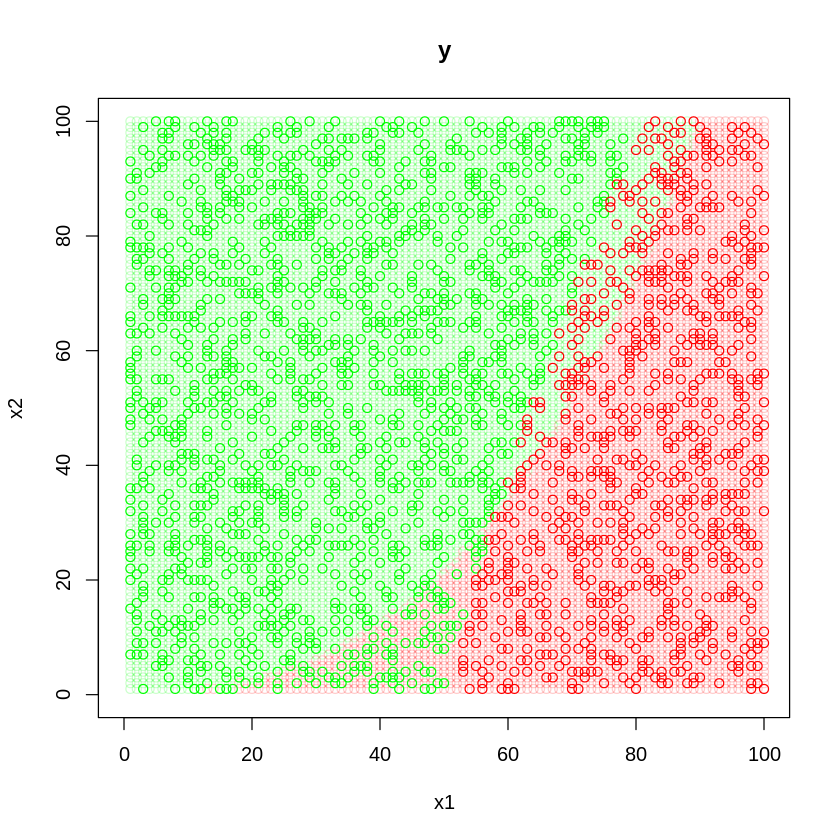

In [ ]:
plot(train[train$y, ]$x1, train[train$y, ]$x2,
      col = scales::alpha('green', 0.2), xlim = c(0, 100), ylim = c(0, 100),
      xlab = "x1", ylab = "x2", main = "y")
points(train[!train$y, ]$x1, train[!train$y, ]$x2,
      col = scales::alpha('red', 0.2))
points(test[prediction$predicted_class, ]$x1,
      test[prediction$predicted_class, ]$x2, col = 'green')
points(test[!prediction$predicted_class, ]$x1,
      test[!prediction$predicted_class, ]$x2, col = 'red')

<div dir='rtl'>
<font color='green'>
رنگ‌های پس‌زمینه نشان دهنده کلاس حقیقی و رنگ‌های دایره‌ای نشان دهنده پیش‌بینی ما است.
</font>
</div>

#<a name='5'></a>
<div dir='rtl'>
<h1>5. رابطه‌ی توزیع دوجمله‌ای با برنولی</h1>
</div>

<div dir='rtl'>
در ارائه‌ی درس دیدیم که توزیع دوجمله‌ای، معادل مجموع نتایج حاصل از تکرار نمونه‌برداری از یک توزیع برنولی است. همچنین دیدیم اگر
$X$
یک متغیر تصادفی از توزیع برنولی با میانگین/احتمال موفقیت
$p$
و
$Y$
متغیر تصادفی از توزیع دوجمله‌ای، حاصل جمع
$n$
بار تکرار نمونه‌برداری از توزیع
$X$
باشد، آنگاه میانگین و واریانس توزیع
$Y$
به شکل زیر قابل محاسبه است:
$$
E[Y] = np
$$
$$
Var(Y) = np(1-p)
$$
در این بخش، قصد داریم این روابط را به صورت عملی بررسی کنیم. ابتدا تابعی برای نمونه برداری از توزیع دوجمله‌ای با استفاده از توزیع برنولی می‌نویسیم. سپس به ازای مقادیر مختلف
$p$
به عنوان میانگین توزیع برنولی مورد استفاده، تعداد زیادی نمونه از توزیع دوجمله‌ای برداشته و سپس میانگین و واریانس را محاسبه می‌کنیم.
با مقایسه‌ی نمودار‌های میانگین و واریانس به ازای مقادیر مختلف
$p$
با نمودار روابط داده شده برای میانگین و واریانس توزیع دوجمله‌ای، صدق این روابط را نشان خواهیم داد.
</div>

<div dir='rtl'>
در ابتدا، تابع نمونه‌برداری از توزیع دوجمله‌ای را بر مبنای توزیع برنولی پیاده‌سازی می‌کنیم. فرض کنید قصد داریم
$m$
نمونه از توزیع دوجمله‌ای متناظر با
$n$
بار تکرار یک توزیع برنولی تولید کنیم.
برای این کار نیاز داریم
$m$
دسته
$n$
تایی از توزیع برنولی مذکور نمونه برداری کرده و مجموع نمونه‌های هر دسته را محاسبه و به عنوان مقدار خروجی بازگردانیم.
برای ایجاد این دسته بندی، با هدف پرهیز از استفاده از حلقه
$for$،
در ابتدا
$n*m$
نمونه از توزیع برنولی گرفته و با یک تغییر ابعاد، آن‌ها را به یک ماتریس
$m$
در
$n$
تبدیل و مجموع هر سطر را محاسبه می‌کنیم.
</div>

In [ ]:
install.packages("statip")
library(statip)
# `rbern(n, p)` function, defined in "statip" library, returns `n` sample of
# bernuli distribution with `p=p`.
rbern(10, .3)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘clue’




[1] 0 1 0 1 0 1 0 0 0 1

In [ ]:
# `rbinomial(m, n, p)` function is going to return `m` sample of binomial
# distribution which presents `n` sample of bernoli distribution with `p=p`.
rbinomial <- function(m, n, p) {
  data <- matrix(rbern(m*n, p))
  # Next line is reshaping `data` with m*n length to (m, n).
  dim(data) <- c(m, n)
  # After that we will sum up each row.
  data <- rowSums(data)
  return (data)
}

rbinomial(5, 10, .3)

[1] 4 3 3 3 4

<div dir='rtl'>
حال به ازای مقدار ثابت
$n=500$،
به ازای هر
$p$،
۵۰۰۰
نمونه از توزیع دوجمله‌ای برداشته و میانگین و واریانس را محاسبه و رسم می‌کنیم.
</div>

In [ ]:
theoretical_mean = c()
theoretical_var = c()
observed_mean = c()
observed_var = c()

n = 500
samples_count = 5000
for (p100 in 0:100) {
  p = p100/100
  # We can use `c()` function to concatinate two lists.
  theoretical_mean = c(theoretical_mean, n*p)
  theoretical_var = c(theoretical_var, n*p*(1-p))
  samples = rbinomial(samples_count, n, p)
  # `mean()` function computes mean of a population.
  observed_mean = c(observed_mean, mean(samples))
  # `var()` function computes variance of a population.
  observed_var = c(observed_var, var(samples))
}

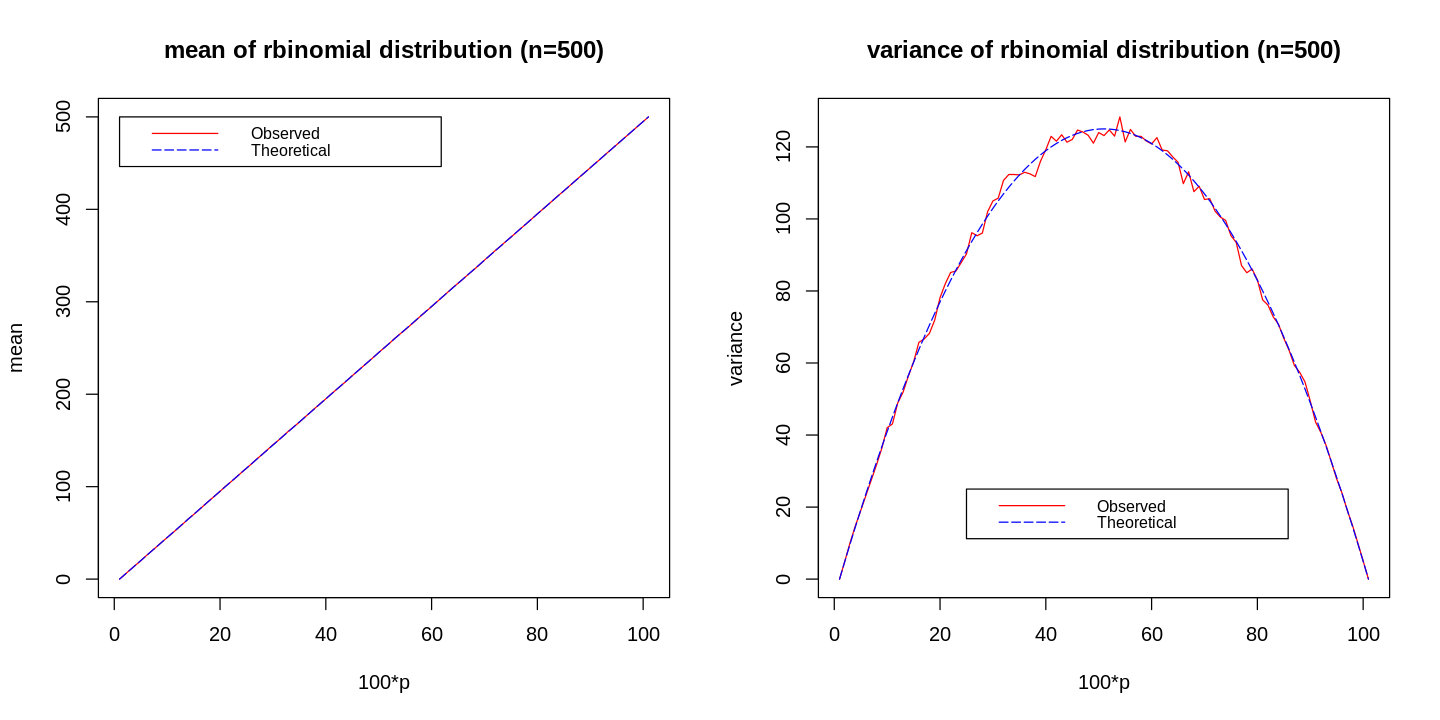

In [ ]:
options(repr.plot.width=12, repr.plot.height=6)
par(mfrow=c(1,2))

plot(observed_mean, xlab = "100*p", type = "l", ylab = "mean", lty=1,
    main = "mean of rbinomial distribution (n=500)", col = 'red')
lines(theoretical_mean, col = 'blue', lty=5)
legend(1, 500, legend=c("Observed", "Theoretical"),
       col=c("red", "blue"), lty=c(1,5), cex=.8)

plot(observed_var, xlab = "100*p", type = "l", ylab = "variance",
    main = "variance of rbinomial distribution (n=500)", col = 'red')
lines(theoretical_var, col = 'blue', lty=5)
legend(25, 25, legend=c("Observed", "Theoretical"),
       col=c("red", "blue"), lty=c(1,5), cex=.8)

<div dir='rtl'>
زبان
R
به صورت پیشفرض، توزیع دوجمله‌ای را آماده کرده و در اختیار می‌گذارد. در انتهای این بخش با دو تابع از این توزیع آشنا خواهیم شد:
</div>

In [ ]:
# `rbinom(m, n, p)` returns `m` samples of a binomial distribution with
# parameters `n`,`p`.
rbinom(5, 10, .3)

[1] 5 5 3 1 2

In [ ]:
# `dbinom(x, n, p)` returns probability of getting `x` as output of a binomial
# distribution with parameters `n`,`p`.
dbinom(3, 10, .3)

[1] 0.2668279

<div dir='rtl'>


</div>

#<a name='6'></a>
<div dir='rtl'>
<h1>6.  شبیه سازی   </h1>
</div>

<div dir='rtl'>
در ارائه‌های درس با تابع توزیع تجمعی و مفاهیم آن آشنا شدیم و می‌دانیم که تابع توزیع تجمعی
$F_X(x)$
احتمال وقوع رویداد‌های
$X<x$
را برای ما مشخص می‌سازد.
در زبان برنامه نویسی
$R$
توابع مختلفی جهت محاسبه‌ی توابع توزیع تجمعی، جرم احتمال و معکوس آن‌ها وجود دارد.
در این بخش قصد داریم  با استفاده از ابزار‌های موجود شبیه سازی به مدلسازی و حل یک مسئله بپردازیم.
</div>

<div dir='rtl'>
مسئله‌ی آسانسور: مرکز معتبر موسیقی امیرانه روزانه پذیرای اجرای هنرمندان بلند آوازه می‌باشد. سالن‌ اجرای این مرکز هنری گنجایش حضور 50 نفر از علاقه‌مندان را دارا می‌باشد. جهت رفاه حال علاقه‌مندان، مدیر این مجموعه به دنبال تعبیه و نصب آسانسور در این مرکز می‌باشد. بدین منظور تیم مدیریتی به شرکت معتبر آسانسور گلستانه مراجعه می‌کنند. متخصصین گلستانه ضمن استقبال از طرح نصب آسانسور به مدیر مرکز هنری گوشزد می‌نمایند که جهت عملکرد مناسب و طولانی مدت، آسانسور باید در 80 درصد موارد استفاده حداکثر با 50 درصد ظرفیت قابل حمل کار کند. بنابراین ابتدا مرکز امیرانه باید با بررسی آماری این ظرفیت را تعیین کرده و سپس اقدام به تهیه و نصب آسانسور نماید.
</div>

<div dir='rtl'>
 مدیر مسئول امیرانه با شما به عنوان متخصص آمار و احتمال تماس گرفته و از شما جهت حل مسئله درخواست کمک می‌نماید. شما با بررسی کامل مسئله متوجه حقایق زیر می‌شوید:
<br/>
1. تمام شرکت کنندگان به صورت همزمان در مرکز حضور دارند و تنها یک بار از آسانسور استفاده می‌گردد.
<br/>
2.   همانطور که در توضیحات ابتدایی مطرح شد مرکز امیرانه تنها گنجایش 50 نفر را در هر روز دارد و این تعداد همواره ثابت است.
<br/>
3.   وزن شرکت کنندگان مرکز امیرانه را می‌توان یک متغیر تصادفی در نظر گرفت که از یک توزیع یکنواخت گسسته در بازه‌ی 50-100 کیلوگرم پیروی می‌کند
(دقت نمایید توزیع گسسته است).
همچنین وزن هر شخص با استفاده از متغیر تصادفی
$X$
نشان داده می‌شود.
<br/>
4. استفاده فرد
$i$
ام
از آسانسور از یک توزیع برنولی پیروی می‌نماید که پارامتر این توزیع برنولی برای هر شخص برابر با $p_i$ است:
$$ Y_i \sim Ber(p_i); \,\, i \in \{1,2,...,50\}$$
که در رابطه‌ی بالا
$Y_i \in \{0,1\}$
نشان دهنده‌ی استفاده یا عدم استفاده از شخص
$i$
ام از آسانسور می‌باشد.
<br/>
5. همانطور که اشاره شد پارامتر احتمال توزیع برنولی برای هر شخص به صورت منحصر به فرد تعیین می‌گردد. در واقع افراد با وزن بیشتر علاقه بیشتری به استفاده از آسانسور دارند. شما پس از بررسی‌های دقیق متوجه می‌شوید که رابطه‌ی زیر صادق است:
$$ P_i = 1 - e^{(-a X_i)}; \,\, a = 0.003, i \in \{1, 2,...,50\}$$
که در رابطه‌ی بالا
$a$
یک پارامتر تعیین شده است و
$X_i$
وزن شخص
$i$
ام است.
<br/>
6. در نهایت مجموع وزن افراد حاضر در آسانسور نیز یک متغیر تصادفی است که با استفاده از
$W$ نمایش می‌دهیم.
</div>

<div dir='rtl'>
حال بر اساس مدلسازی صورت گرفته از مسئله ابتدا سعی خواهیم کرد که با استفاده از شبیه سازی تابع توزیع تجمعی را پیدا کرده و سپس بر اساس آن تحلیل‌های مرتبط را انجام دهیم.
</div>

<div dir='rtl'>
ابتدا تابعی می‌نویسیم تا احتمال استفاده هر فرد از آسانسور را مطابق بند 3
و
4
تعیین نماید.
</div>

In [ ]:
install.packages("pracma")
library(purrr)
library(pracma)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘pracma’


The following object is masked from ‘package:purrr’:

    cross




In [ ]:
# Inputs:
#    people_weights: A vector of people weights, which ith element of the vector determines the ith person's weight.
# Outputs:
#    A binary vector of length of people_number: ith element determines the ith person will use the elevator or not
#    if 1: The corresponding  person aims to use the elevator
#    if 0: The corresponding  person do not use the elevator

stairs_or_elevator = function(people_weights)
{
  # "a" is the hyperparameter of our model (as mentioned before)
  Y = c()
  a = 0.003

  # In a for loop, based on the weight of each person, determine its corresponding  p_i.
  # In each iteration, generate a single sample from Bernoulli(p_i) distribution to determine the ith person
  # wants to use the elevator or not.

  for(i in 1:length(people_weights)) {
    p = 1 - exp(-a*people_weights[i])
    Y = c(Y, rbinom(1,1,p))
  }

  return(Y)
}

<div dir='rtl'>
حالا یک بار رفت‌و‌آمد آسانسور را شبیه‌سازی کرده و مجموع وزن افراد حاضر در آسانسور را مشخص می‌نماییم.
</div>

In [ ]:
# Inputs:
#    people_number: As mentioned before, the concert hall accommodates up to 50 viewers.
#                   Set this to 50.
# Outputs:
#    Total weight of the people in the elevator.

elevator = function(people_number)
{

  # As mentioned before, a person's weight is a random variable with a discrete uniform distribution.
  # In R, we do not have the discrete uniform distribution; however, we can use rdunif instead to
  # generate integer samples in the interval of [50, 100]
  weights = rdunif(people_number,b=100,a=50)

  # Now apply the stairs_or_elevator function on the weights vector to obtain the Y
  Y = stairs_or_elevator(weights)

  # Determine the total weight of the people that decide to use the elevator
  w = dot(Y, weights)

  return(w)
}

<div dir='rtl'>
فراموش نکن! مجموع وزن افراد حاضر در آسانسور خودش یک متغیر تصادفیه! برای بدست آوردن توزیعش اول از همه باید
$n$
بار  مسئله رو اجرا کنیم. مثلا
$n$
رو
$1000$
فرض کن.
</div>

In [ ]:
elevator_n = function(n, people_number)
{
  return(vapply(rep(people_number, n), elevator, numeric(1)))
}

In [ ]:
n_run = 1000

#Simulate for the n_run times
total_weights = elevator_n(n = n_run, people_number = 50)

<div dir='rtl'>
خوب تا به حال کارهای شبیه سازی مسئله انجام شده. اما باید به بررسی و تحلیل مسئلمون بپردازیم. اول از همه دیتامون رسم می‌کنیم.
</div>

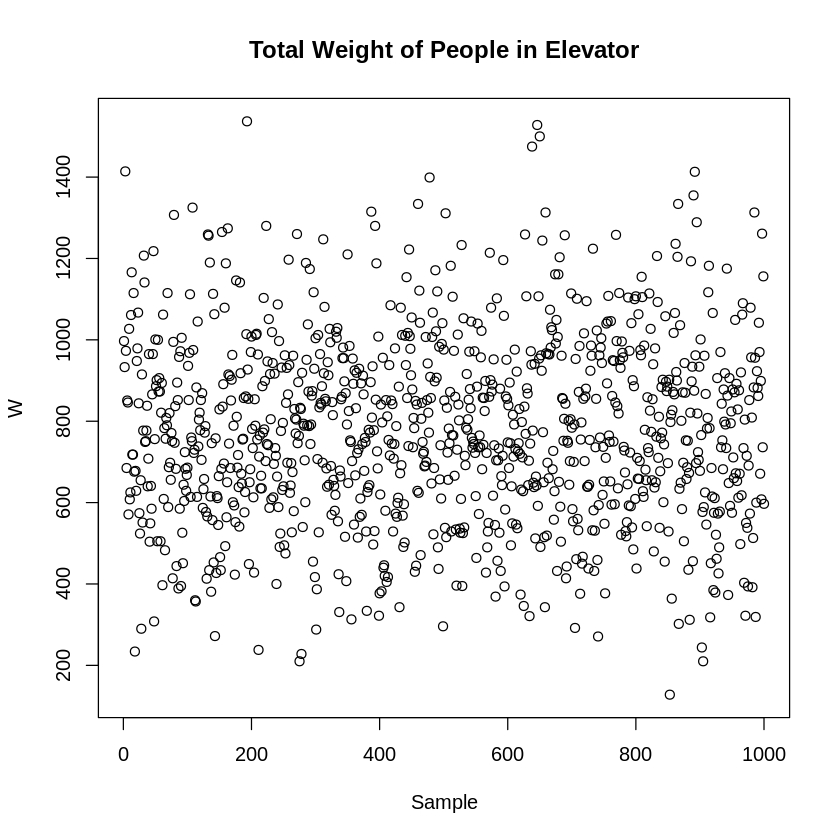

In [ ]:
plot(total_weights, main="Total Weight of People in Elevator",
   xlab="Sample", ylab="W")

<div dir='rtl'>
همانطور که در ابتدا اشاره شد شما قصد دارید با ارائه‌ی تحلیل‌های آماری به مدیر امیرانه کمک کنید تا پیش‌بینی کنند که در 80 درصد مواقع آسانسور باید حداکثر چه وزنی را  حمل نماید.
مطابق ارائه‌های درس می‌توانیم از تابع توزیع تجمعی برای حل مسئله فوق استفاده نماییم:

\begin{equation}
	\begin{aligned}
			&F_W(w) = pr\{ W<w\}\\
			&\to F_W(w_{ideal}) = 0.8 \to w_{ideal} = F_W^{-1}(0.8)
 	\end{aligned}
\end{equation}

همانطور که ملاحظه می‌گردد
$w_{ideal}$
همان وزن مورد نظر است
که می‌توان بر اساس تابع توزیع تجمعی آنرا محاسبه کرد.

در این بخش قصد داریم با استفاده از توابع آماده در
$R$
تابع توزیع تجمعی داده‌های حاصل شده از شبیه سازی را بدست آورده و سپس تحلیل‌های مورد نظر را انجام دهیم.
</div>

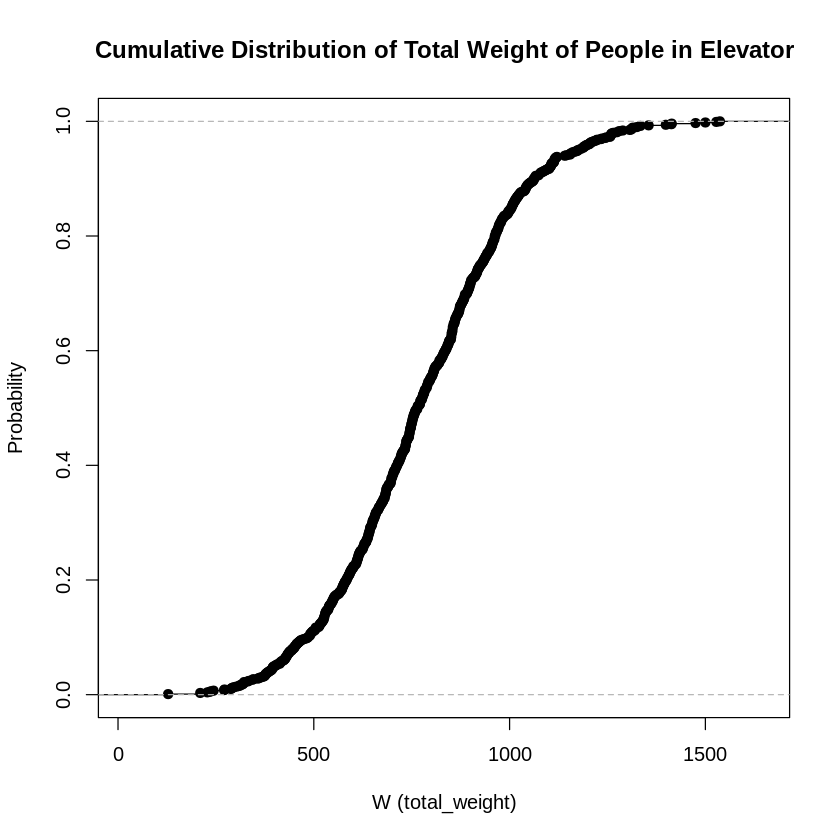

In [ ]:
#ecdf plots the cumulative  distribution function diagram based on a given dataset
F10 <- ecdf(total_weights)

plot(F10, main="Cumulative Distribution of Total Weight of People in Elevator",
   xlab="W (total_weight)", ylab="Probability")

<div dir='rtl'>
حال بر اساس نمودار فوق تعیین کنید که آسانسور در 80 درصد مواقع باید چه وزنی را حمل نماید، سپس بر اساس آن به مدیر امیرانه گزارش‌های مرتبط را اعلام نمایید.
</div>

#<a name='7'></a>
<div dir='rtl'>
<h1>7. مدل بیزی با دیگر توزیع‌ها</h1>
</div>

<div dir='rtl'>
پیشتر پیاده‌سازی مدل‌های بیزی مبتنی بر توزیع برنولی را مشاهده کردید. اما گفته شد به هر مدلی که تصمیم‌گیری را بر مبنای قاعده‌ی بیز انجام دهد، مدل بیزی گفته می‌شود. در این بخش یک مدل بیزی را بررسی خواهیم کرد که از توزیع‌های پواسون و نمایی استفاده می‌کند.
</div>

<div dir='rtl'>
مثال) فرض کنید قصد داریم وقوع حمله‌ی سایبری به یک سایت را در هر ساعت، بر مبنای دو ویژگی تعداد درخواست‌های ارسالی به سایت و تعداد خرید‌های انجام شده از سایت پیشگویی کنیم. با بررسی‌های انجام شده، مشخص شده که دو متغیر پیشگو مطرح (تعداد درخواست‌ها و تعداد خرید‌ها) به شرط متغیر پاسخ (وقوع حمله) از هم مستقل بوده و به ترتیب، از توزیع‌های پواسون و نمایی پیروی می‌کنند به نحوی که اگر متغیرهای تصادفی
$X_1$ و $X_0$
را به ترتیب مربوط به تعداد درخواست‌ها در ساعتی که حمله رخ داده یا نداده و متغیر‌های تصادفی
$Y_1$ و $Y_0$
را به ترتیب مربوط به تعداد خرید‌ها در ساعتی که حمله رخ داده یا نداده در نظر بگیریم، داریم:
$$
X_0 \sim Poi(100) , X_1 \sim Poi(300)
$$
$$
Y_0 \sim Exp(0.1) , Y_1 \sim Exp(0.25)
$$
همچنین احتمال رخداد حمله برابر
$0.1$
درنظر گرفته شده است.
</div>

<div dir='rtl'>
برای پاسخگویی به مسئله‌ی مطرح شده، ابتدا نیاز داریم برای هر یک از چهار متغیر تصادفی داده شده، تابعی داشته باشیم که با دریافت مقدار، احتمال مشاهده‌ی آن مقدار را خروجی دهد تا بتوانیم از این احتمال در رابطه‌ی بیز استفاده کنیم. توابع
`dpois`
و
`dexp`
که توابع پیشفرض زبان
R
هستند به سادگی این خواسته را برآورده می‌کنند:
</div>

In [ ]:
# `dpois(x, lambda)` returns probability of getting `x` as output of a poisson
# distribution with parameter `lambda`.
dpois(1, 3)
dpois(2, 3)

[1] 0.1493612

[1] 0.2240418

In [ ]:
# `dexp(x, rate)` returns probability of getting `x` as output of a exponential
# distribution with parameter `rate`.
dexp(1, 3)
dexp(2, 3)

[1] 0.1493612

[1] 0.007436257

<div dir='rtl'>
حال برای هر یک از پیش‌آمد‌های ممکن برای متغیر پاسخ (وقوع حمله) یک تابع تعریف خواهیم کرد که با دریافت مقادیر متغیر‌های پیشگو (تعداد درخواست‌ها و تعداد خرید‌ها) امتیاز آن پیش‌آمد را برگرداند. منظور از امتیاز، خروجی رابطه‌ی بیز بدون درنظر گرفتن مخرج کسر است (دلیل صرف‌نظر از مخرج کسر در بخش دوم توضیح داده شد).
اگر این امتیاز را با
$B$
نشان دهیم:
$$
B_{True}(x,y) = 0.1 P_{X_1}(x) P_{Y_1}(y)
$$
$$
B_{False}(x,y) = 0.9 P_{X_0}(x) P_{Y_0}(y)
$$
<li>
درستی روابط بالا را نشان دهید.
</li>
</div>

In [ ]:
Btrue <- function(x, y) {
  return (
    0.1 * dpois(x, 300) * dexp(y, 25)
  )
}

Bfalse <- function(x, y) {
  return (
    0.9 * dpois(x, 100) * dexp(y, 0.1)
  )
}

Btrue(100, 1)
Bfalse(100, 1)

[1] 9.870865e-52

[1] 0.003246095

<div dir='rtl'>
حال با یک مقایسه‌ی ساده بر روی خروجی توابع بالا، می‌توانیم به ازای هر ورودی، پیشگویی را انجام دهیم:
</div>

In [ ]:
predict_attack <- function(x, y) {
  return (Btrue(x, y) > Bfalse(x, y))
}

predict_attack(100, 1)
predict_attack(1000, 1)

[1] FALSE

[1] TRUE

<div dir='rtl'>
<li>
سعی کنید منطق این پیشگویی را با زبان عامیانه توضیح دهید.
</li>
<li>
مسائل دیگری با استفاده از توزیع‌های دیگر مطرح کرده و پیشگوی آن‌ها را پیاده‌سازی کنید. با جستجو در اینترنت، می‌توانید توابع مشابه برای دیگر توزیع‌ها را پیدا کنید.
</li>
<li>
برای یک پیشگویی قوی (که صدق بیشتری در پیشگویی داشته باشد) به کمک مدل‌های بیزی، بهتر است مشابه آنچه در بالا انجام شد، برای هر متغیر پیشگو از توزیع مناسب آن استفاده شود. این عمل کار ساده‌ای نیست. هرچند روش‌هایی برای محاسبه‌ی پارامتر‌های توزیع‌ها با نگاه به نمونه‌ها وجود دارد، راهی برای پی بردن به نوع واقعی توزیع مربوط به یک متغیر وجود نداشته و نیازمند دانش جانبی نسبت به مسئله است. در آینده با روش‌های تخمین پارامتر توزیع‌ها آشنا خواهید شد. در آن بخش، به آموزش مدل‌های بیزی با استفاده از دادگان آموزشی خواهیم پرداخت که هدف پیدا کردن توزیع‌های مناسب‌تر برای استفاده در مدل بیزی است.
</li>
</div>

<div dir='rtl'>
<font color='green'>
<h3><font color='green'>اگر مشتاق مشاهده بیشتر هستید، ادامه دهید:</font></h3>
قصد داریم نحوه طبقه‌بندی مدل‌های بیزی را به صورت بصری مشاهده کنیم.
کد‌های این قصمت توضیح داده نخواهند شد.
</font>
</div>

In [ ]:
df = data.frame(row.names = seq(1, 100 * 30))
df['x'] = rep(seq(100), 30) * 10
df['y'] = rep(seq(30), each = 100)
df['prediction'] = apply(df, 1, function(row) {
    return (predict_attack(row['x'], row['y']))
  })
head(df)

,x,y,prediction
,<dbl>,<int>,<lgl>
1,10,1,FALSE
2,20,1,FALSE
3,30,1,FALSE
4,40,1,FALSE
5,50,1,FALSE
6,60,1,FALSE


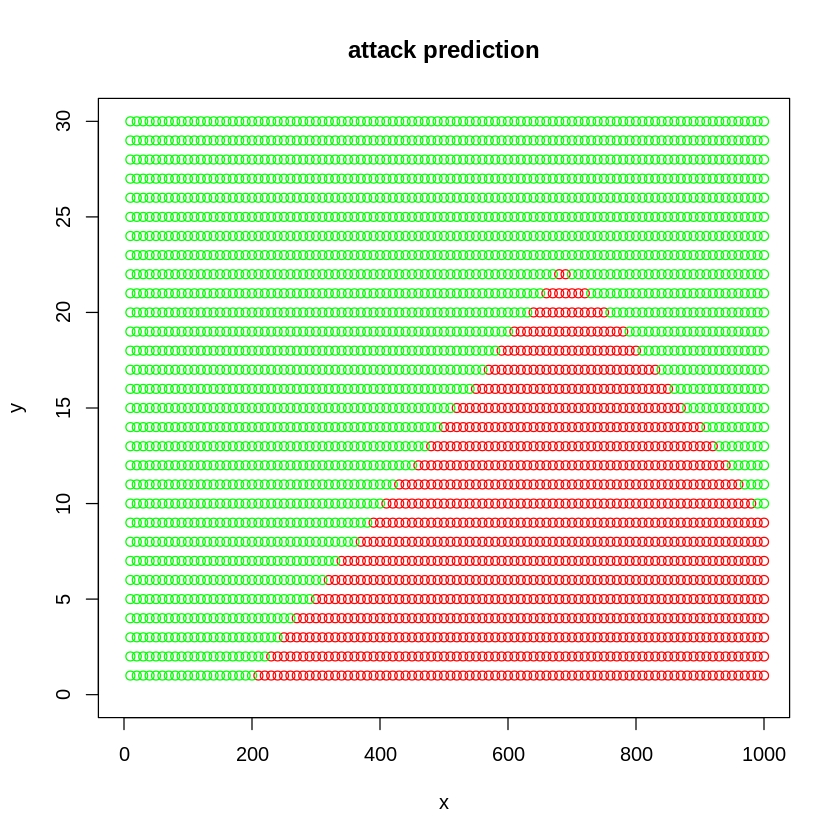

In [ ]:
plot(df[df$prediction, ]$x, df[df$prediction, ]$y, xlab = "x", ylab = "y",
  xlim = c(0, 1000), ylim = c(0, 30), main = "attack prediction", col = 'red')
points(df[!df$prediction, ]$x, df[!df$prediction, ]$y, col = 'green')

<div dir='rtl'>
<font color='green'>
رنگ قرمز به معنی پیشگویی وقوع حمله و رنگ سبز به معنی پیشگویی عدم وقوع حمله است.
</font>
</div>

#<a name='9'></a>
<div dir='rtl'>
<h1>9. تخمین توزیع بتا</h1>
</div>

<div dir='rtl'>
در مطالب تدریسی مشاهده کردید که توزیع بتا یک توزیع منعطف، با توانایی اعمال محدوده سخت برای مقادیر متغیر تصادفی خود است. از این رو، این توزیع یک کاندید مناسب برای مدل کردن توزیع متغیر‌های تصادفی‌ای است که مقادیر آن‌ها محدود به یک بازه خاص است. برای برازش این توزیع بر روی مشاهدات، می‌توان از تخمین بیزی برای تخمین پارامتر‌های توزیع استفاده کرد. در این تمرین از بازپیاده سازی محاسبات خودداری کرده و از قابلیت‌های زبان R استفاده خواهیم کرد.
</div>

<div dir='rtl'>
پیش‌تر سعی بر تخمین عملکرد نهایی دانشجویان درس ریاضیات گسسته در امتحان نهایی کردیم. اما در آن زمان، نمرات را به دو دسته pass و fail
تقسیم کردیم تا بتوانیم از توزیع برنولی استفاده کنیم. اما اگر بخواهیم توزیعی برای مقدار دقیق نمرات داشته باشیم باید چه کنیم؟ می‌دانیم محدوده نمرات محدود است (در دادگان ما این نمرات به بازه صفر تا صد نگاشت شده‌اند). بنابراین برازش توزیع بتا بر روی آن‌ها می‌تواند نتایج مطلوبی به دنبال داشته باشد. در این تمرین این مسئله را بررسی می‌کنیم.
</div>

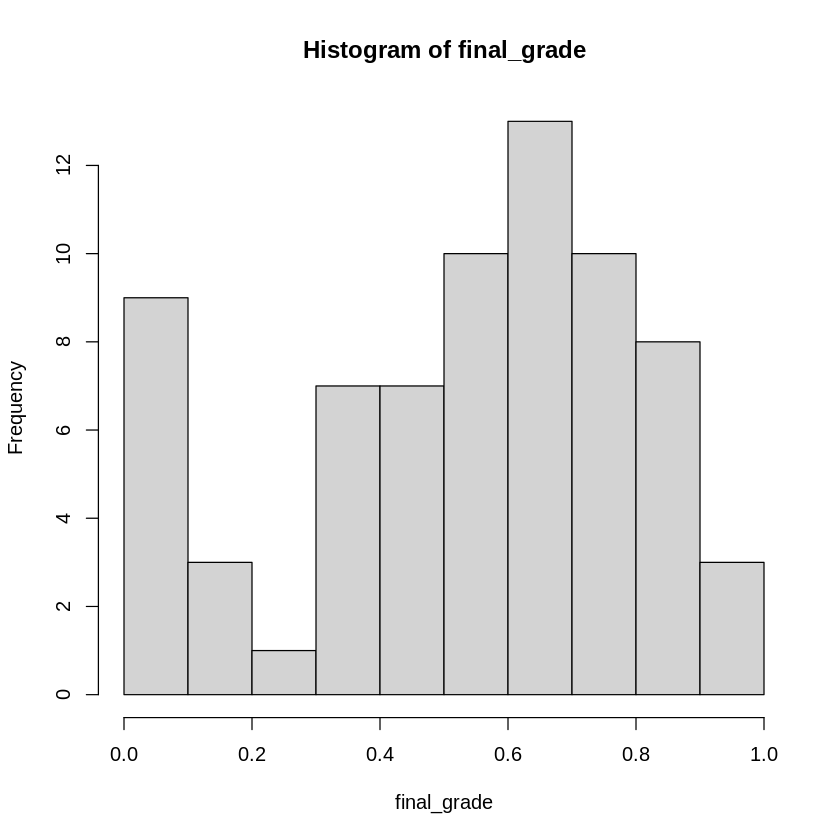

In [ ]:
final_grade = c(
  0.0  , 54.0 , 46.5 , 0.0  , 37.0 , 9.0  , 56.5 , 42.3 , 70.5 , 76.5 , 0.0  ,
  37.5 , 57.5 , 62.0 , 87.5 , 0.0  , 94.5 , 75.6 , 14.5 , 41.1 , 91.5 , 90.5 ,
  73.0 , 68.0 , 52.0 , 19.5 , 65.5 , 51.0 , 64.0 , 39.0 , 79.3 , 66.0 , 69.5 ,
  33.8 , 44.5 , 51.9 , 38.8 , 52.2 , 45.0 , 66.5 , 64.5 , 56.7 , 0.0  , 87.0 ,
  27.5 , 63.7 , 49.0 , 16.2 , 0.0  , 84.2 , 53.5 , 80.5 , 37.5 , 0.0  , 87.5 ,
  56.0 , 74.5 , 85.5 , 70.0 , 88.5 , 69.5 , 83.8 , 61.5 , 32.0 , 65.5 , 78.0 ,
  47.5 , 73.0 , 79.2 , 76.0 , 0.0
)

# Normalize final_grade to be in [0,1].
final_grade = final_grade/100

hist(final_grade)

<div dir='rtl'>
مشاهده می‌کنیم که مقادیر صفر نمودار را از حالت طبیعی خارج کرده‌اند. دلیل این امر آن است که نمره غایبین امتحان واقعا از توزیع نمرات امتحان پیروی نمی‌کند. بنابراین خوب است اگر این مقادیر را از دادگان حذف کنیم.
</div>

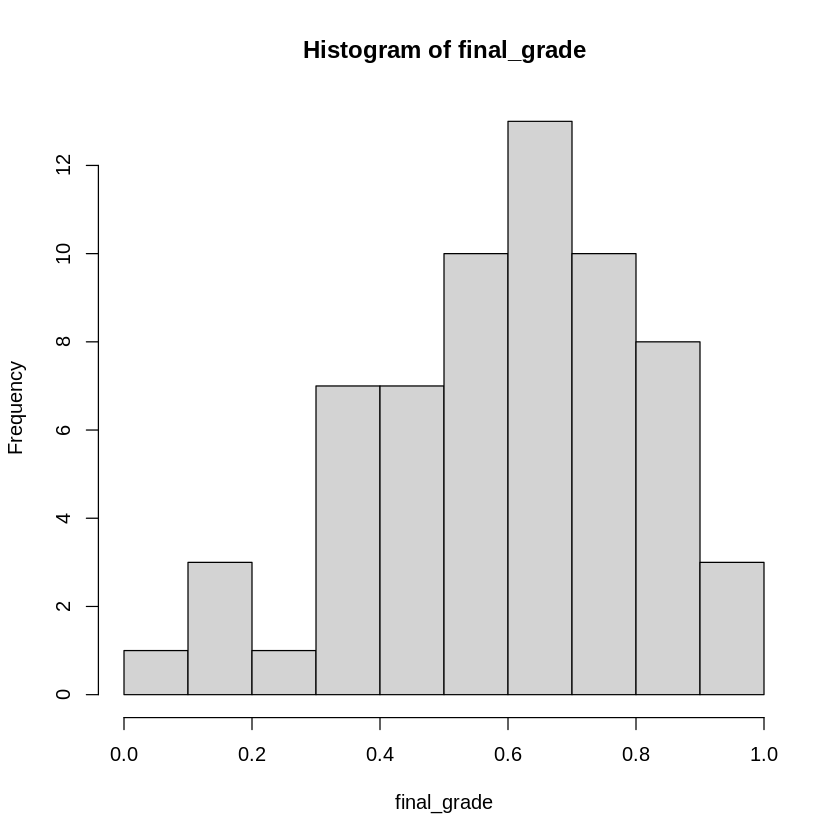

In [ ]:
# Remove zero values from final_grade.
final_grade = final_grade[final_grade > 0]

hist(final_grade)

In [ ]:
install.packages("EnvStats")
library(EnvStats)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
# Estimate beta distribution parameters using `ebeta()` function which
# is defined in the EnvStats library.
beta_dist_estimation = ebeta(final_grade)

a = beta_dist_estimation$parameters["shape1"]
b = beta_dist_estimation$parameters["shape2"]

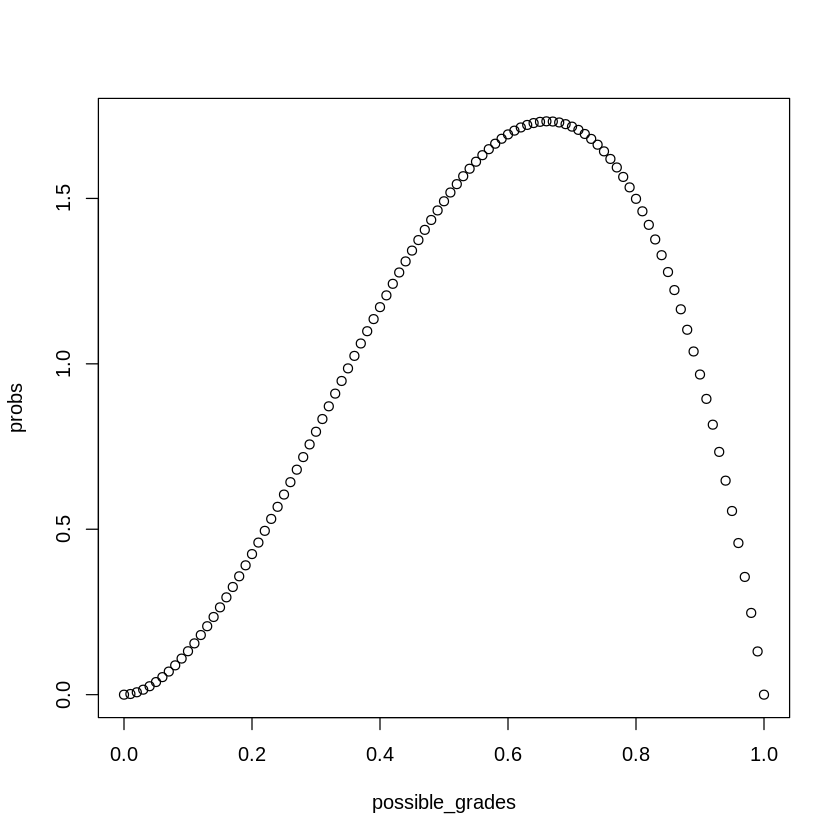

In [ ]:
# Computing distribution density given the estimated parameters using `dbeta()`.
possible_grades = seq(0, 1, by = 0.01)
probs = dbeta(possible_grades, shape1 = a, shape2 = b)

plot(possible_grades, probs)

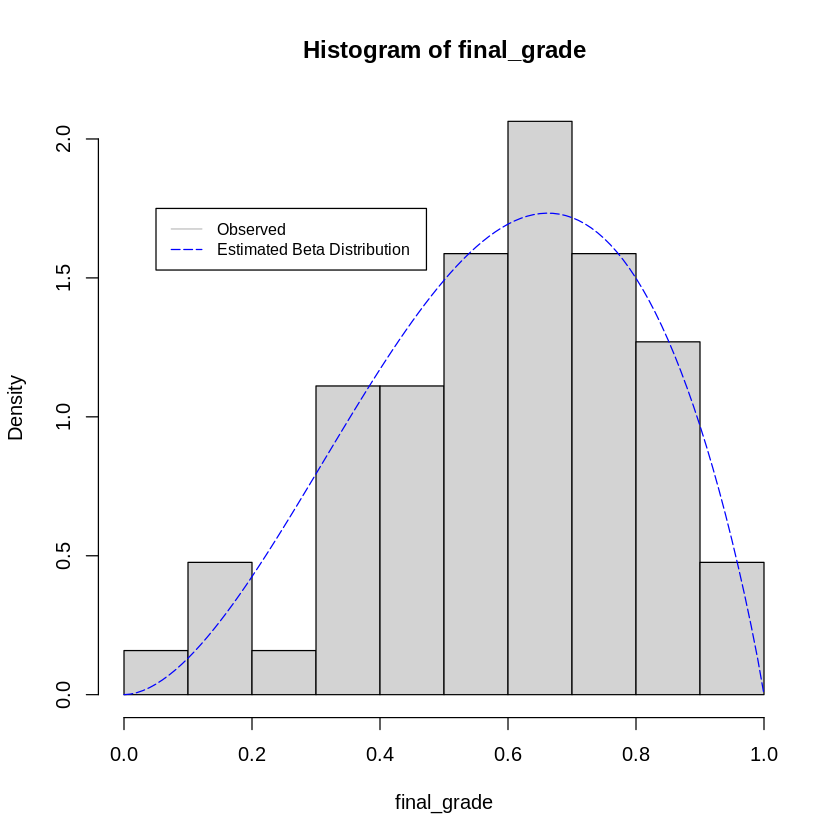

In [ ]:
# Plot

hist(final_grade, freq = FALSE)
lines(possible_grades, probs, col = 'blue', lty=5)
legend(0.05, 1.75, legend=c("Observed", "Estimated Beta Distribution"),
       col=c("gray", "blue"), lty=c(1,5), cex=.8)